In [29]:
import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'C:/Users/dnsan/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\dnsan\AppData\Local\Temp\ipykernel_31352\32209847.py:4: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [66]:
pm = pd.read_csv('./dataset/META/pmmap.csv')

In [67]:
aws = pd.read_csv('./dataset/META/awsmap.csv')

In [68]:
pm.head()

,Location,Latitude,Longitude,Description
0,아름동,36.512252,127.246789,세종특별자치시 보듬3로 114 아름동커뮤니티센터 옥상 (아름동)
1,신흥동,36.592887,127.292550,세종 조치원읍 군청로 87-16(신흥동) 세종특별자치시 조치원청사 옥상
2,노은동,36.368242,127.318498,대전 유성구 노은동로 87번길 89(노은1동 주민센터) 노은1동 주민센터 3층 옥상
3,문창동,36.317215,127.437825,대전 중구 보문로 20번길 38(문창동 주민센터) 문창동 주민센터
4,읍내동,36.372388,127.417714,대전 대덕구 대전로 1331번길 75(태아산업(주)) 태아산업(주)


In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

pm['scaler_x'] = scaler.fit_transform(pm[['Latitude']])
pm['scaler_y'] = scaler.fit_transform(pm[['Longitude']])

In [70]:
pm.head()

,Location,Latitude,Longitude,Description,scaler_x,scaler_y
0,아름동,36.512252,127.246789,세종특별자치시 보듬3로 114 아름동커뮤니티센터 옥상 (아름동),0.397070,0.834933
1,신흥동,36.592887,127.292550,세종 조치원읍 군청로 87-16(신흥동) 세종특별자치시 조치원청사 옥상,0.499352,0.874473
2,노은동,36.368242,127.318498,대전 유성구 노은동로 87번길 89(노은1동 주민센터) 노은1동 주민센터 3층 옥상,0.214400,0.896894
3,문창동,36.317215,127.437825,대전 중구 보문로 20번길 38(문창동 주민센터) 문창동 주민센터,0.149675,1.000000
4,읍내동,36.372388,127.417714,대전 대덕구 대전로 1331번길 75(태아산업(주)) 태아산업(주),0.219659,0.982623


In [87]:
len(pm)

17

In [71]:
aws.head()

,Location,Latitude,Longitude,Description
0,오월드,36.2913,127.3959,대전광역시 중구사정공원로 70 오월드 내 플라워랜드
1,세천,36.3402,127.4938,대전광역시 동구세천동 63-1
2,장동,36.4135,127.4382,대전광역시 대덕구장동 360-2
3,세종고운,36.5315,127.2406,세종특별자치시 고운동산 25번지
4,세종금남,36.4585,127.2688,세종특별자치시 시군구금남면 성덕리 77-3


In [72]:
aws['scaler_x'] = scaler.fit_transform(aws[['Latitude']])
aws['scaler_y'] = scaler.fit_transform(aws[['Longitude']])

17it [00:01, 12.64it/s]
C:\Users\dnsan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


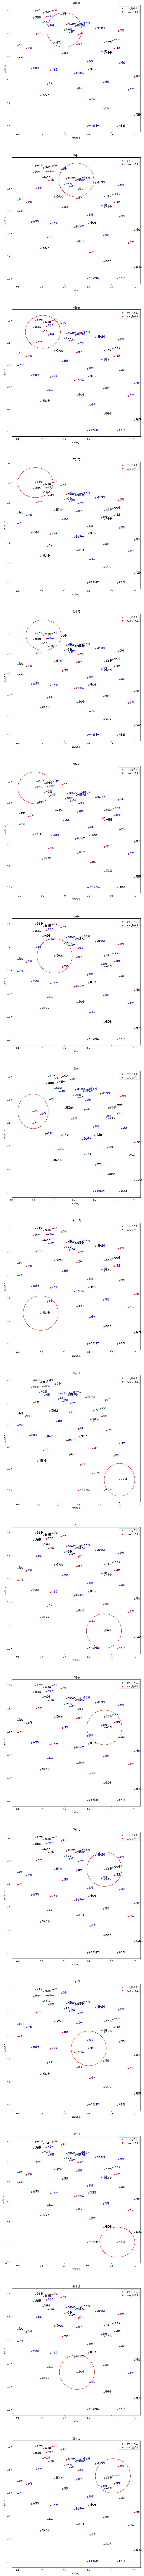

In [96]:
from tqdm import tqdm

plt.figure(figsize=(10, 200))

for idx, value in tqdm(enumerate(pm.values, start=1)):
    
    plt.subplot(17,1,idx)
    sns.scatterplot(x='scaler_x', y='scaler_y', data=pm, label='pm_관측소')
    sns.scatterplot(x='scaler_x', y='scaler_y', data=aws, color='r', label='aws_관측소')

    # add annotations one by one with a loop
    for line in range(len(pm)):
        plt.text(pm.iloc[line].scaler_x+0.01, pm.iloc[line].scaler_y, pm.iloc[line].Location, 
                 horizontalalignment='left', size='medium', color='black', weight='semibold')
        
    for line in range(len(aws)):
        plt.text(aws.iloc[line].scaler_x+0.01, aws.iloc[line].scaler_y, aws.iloc[line].Location, 
                 horizontalalignment='left', size='medium', color='blue', weight='semibold')
        
    circle1 = plt.Circle((value[-2], value[-1]), 0.15, color='r', fill=False)
    plt.title(value[0])
    plt.gcf().gca().add_patch(circle1)

    
plt.show()

## 1-D CNN

In [208]:
data = pd.read_csv('./dataset/mean_data_train.csv')

In [209]:
data.head()

,연도,일시,mean_pm,mean_temp,mean_wind,mean_windspeed,mean_rainy,mean_mature,datetime
0,0,01-01 00:00,0.054588,0.191339,0.339183,0.046938,0.0,0.743353,2001-01-01 00:00:00
1,0,01-01 01:00,0.058824,0.187622,0.305408,0.050098,0.0,0.743647,2001-01-01 01:00:00
2,0,01-01 02:00,0.059059,0.185670,0.351013,0.047540,0.0,0.741706,2001-01-01 02:00:00
3,0,01-01 03:00,0.059859,0.180559,0.256846,0.041823,0.0,0.750647,2001-01-01 03:00:00
4,0,01-01 04:00,0.064659,0.175820,0.274984,0.034903,0.0,0.751176,2001-01-01 04:00:00


In [210]:
train = data.drop(['연도', '일시', 'datetime'], axis=1)

In [211]:
X = []
y = []

for j in range(48, len(train)-72):
    X.append(train.iloc[j-48:j,].values)
    y.append(train.iloc[j:j+72, 0].values)
X_train=np.array(X)
y_train = np.array(y)

In [212]:
X_train.shape, y_train.shape

((34992, 48, 6), (34992, 72))

In [213]:
x_train, x_val, x_test = X_train[:len(X_train)-216], X_train[len(X_train)-216: len(X_train)-72], X_train[len(X_train)-72: len(X_train)]
y_train, y_val, y_test = y_train[:len(y_train)-216], y_train[len(y_train)-216: len(y_train)-72], y_train[len(y_train)-72: len(y_train)]

In [214]:
x_train.shape, x_val.shape, x_test.shape

((34776, 48, 6), (144, 48, 6), (72, 48, 6))

In [215]:
from tensorflow import keras
import tensorflow as tf

keras.backend.clear_session()

il = keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2]))

conv1 = keras.layers.Conv1D(filters=128, kernel_size=5, padding='same')(il)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.Activation(activation='relu')(conv1)
conv1 = keras.layers.Dropout(rate=0.3)(conv1)

conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding='same')(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)
conv2 = keras.layers.Dropout(rate=0.4)(conv2)

conv3 = keras.layers.Conv1D(128, kernel_size=2,padding='same')(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)
conv3 = keras.layers.Dropout(rate=0.5)(conv3)

gap = keras.layers.GlobalAveragePooling1D()(conv3)

ol = keras.layers.Dense(72)(gap)

model = keras.models.Model(inputs=il, outputs=ol)

model.compile(loss=keras.losses.mae, optimizer = keras.optimizers.Adam())

In [216]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 48, 128)           3968      
                                                                 
 batch_normalization (BatchN  (None, 48, 128)          512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 128)           0         
                                                                 
 dropout (Dropout)           (None, 48, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 256)           98560     
                                                             

In [217]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta=0,
                                      verbose=1,
                                      restore_best_weights=True,
                                      patience=10)

mc = keras.callbacks.ModelCheckpoint(monitor='val_loss',
                        filepath=f'./model/cnn1d_model.h5',
                        save_best_only=True,
                         verbose=1)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=1e-6)

In [218]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=[es, mc, reduce_lr], verbose=1, epochs=100)

Epoch 1/100
1085/1087 [============================>.] - ETA: 0s - loss: 0.0430
Epoch 1: val_loss improved from inf to 0.05422, saving model to ./model\cnn1d_model.h5
1087/1087 [==============================] - 11s 9ms/step - loss: 0.0430 - val_loss: 0.0542 - lr: 0.0010
Epoch 2/100
1086/1087 [============================>.] - ETA: 0s - loss: 0.0333
Epoch 2: val_loss improved from 0.05422 to 0.04812, saving model to ./model\cnn1d_model.h5
1087/1087 [==============================] - 11s 10ms/step - loss: 0.0333 - val_loss: 0.0481 - lr: 0.0010
Epoch 3/100
1085/1087 [============================>.] - ETA: 0s - loss: 0.0320
Epoch 3: val_loss did not improve from 0.04812
1087/1087 [==============================] - 10s 9ms/step - loss: 0.0320 - val_loss: 0.0622 - lr: 0.0010
Epoch 4/100
1084/1087 [============================>.] - ETA: 0s - loss: 0.0310
Epoch 4: val_loss did not improve from 0.04812
1087/1087 [==============================] - 10s 9ms/step - loss: 0.0310 - val_loss: 0.0571 

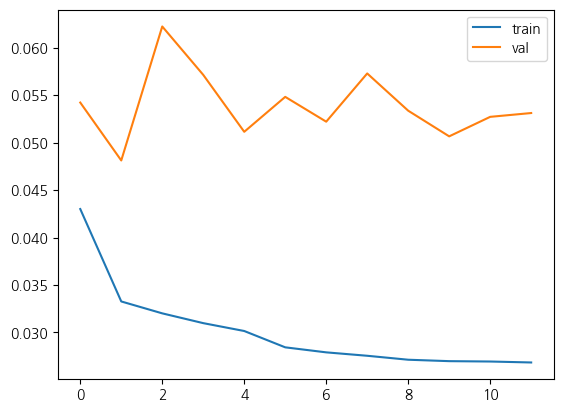

In [219]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

In [221]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 16ms/step - loss: 0.0992


0.09922455251216888

In [274]:
dict = {'정림동': '오월드', '문창동': '오월드', '읍내동': '장동', '노은동': '계룡', '아름동': '세종고운',
       '신흥동': '세종연서', '공주': '공주', '논산': '논산', '대천2동': '대천항', '홍성읍': '홍북',
       '예산군': '예산', '모종동': '아산', '신방동': '성거', '성성동': '성거', '동문동': '태안',
       '이원면': '안도', '독곶리': '대산'}

In [275]:
labels = os.listdir('./dataset/TRAIN')

In [276]:
test_merge_df = []

for label in labels:
    name = label.split('.')[0]
    df = pd.read_csv(f'./dataset/TEST_INPUT/{label}')
    df_aws = pd.read_csv(f'./dataset/TEST_AWS/{dict[name]}.csv')
    test_merge_df.append([df, df_aws])
    print(f'{label} + {dict[name]}.csv가 merge 되었습니다.')
    


for idx, df in tqdm(enumerate(test_merge_df)):
    tmp = df[0].iloc[:-48]
    aws_tmp = df[1].iloc[:-48]
    temp_merge = pd.merge(left=tmp, right=aws_tmp, how='left', on=['연도', '일시'])
    
    if idx == 0:
        result = temp_merge
    else:
        result = pd.concat([result, temp_merge], axis=0)
        
result.tail()

공주.csv + 공주.csv가 merge 되었습니다.
노은동.csv + 계룡.csv가 merge 되었습니다.
논산.csv + 논산.csv가 merge 되었습니다.
대천2동.csv + 대천항.csv가 merge 되었습니다.
독곶리.csv + 대산.csv가 merge 되었습니다.
동문동.csv + 태안.csv가 merge 되었습니다.
모종동.csv + 아산.csv가 merge 되었습니다.
문창동.csv + 오월드.csv가 merge 되었습니다.
성성동.csv + 성거.csv가 merge 되었습니다.
신방동.csv + 성거.csv가 merge 되었습니다.
신흥동.csv + 세종연서.csv가 merge 되었습니다.
아름동.csv + 세종고운.csv가 merge 되었습니다.
예산군.csv + 예산.csv가 merge 되었습니다.
읍내동.csv + 장동.csv가 merge 되었습니다.
이원면.csv + 안도.csv가 merge 되었습니다.
정림동.csv + 오월드.csv가 merge 되었습니다.
홍성읍.csv + 홍북.csv가 merge 되었습니다.


17it [00:00, 134.75it/s]


,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
7675,4,11-16 19:00,홍성읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,4,11-16 20:00,홍성읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7677,4,11-16 21:00,홍성읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,4,11-16 22:00,홍성읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7679,4,11-16 23:00,홍성읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
result.reset_index(inplace=True, drop=True)

In [278]:
result.shape

(130560, 10)

In [279]:
result.head()

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,4,01-01 00:00,공주,0.060,공주,0.244866,0.123333,0.038363,0.0,0.647
1,4,01-01 01:00,공주,0.064,공주,0.232227,0.167778,0.033248,0.0,0.648
2,4,01-01 02:00,공주,0.072,공주,0.206951,0.000000,0.002558,0.0,0.734
3,4,01-01 03:00,공주,0.064,공주,0.199052,0.000000,0.002558,0.0,0.753
4,4,01-01 04:00,공주,0.056,공주,0.189573,0.000000,0.002558,0.0,0.795


In [280]:
for i in range(0,len(result), 120):
    test_x = result.iloc[i:i+48]
    x = test_x.drop(['연도', '일시', '측정소', '지점'], axis=1)
    y_pred = model.predict(x.values.reshape(1,48,-1))
    print(y_pred)
    result.iloc[i+48:i+120, 3] = y_pred[0]

1/1 [==============================] - 0s 17ms/step
[[0.0507115  0.05595224 0.05785433 0.05736058 0.05518594 0.05923347
  0.05528335 0.06014359 0.06342675 0.06287888 0.07154886 0.06418939
  0.06983237 0.07065187 0.06751756 0.07240084 0.07248191 0.06435861
  0.0799517  0.07495817 0.08250454 0.08759829 0.08260441 0.08494074
  0.09743106 0.092921   0.09114935 0.08481789 0.09333662 0.10159433
  0.08957145 0.09715977 0.10190168 0.09516387 0.09686778 0.09625903
  0.09963798 0.10743465 0.09702429 0.09636761 0.1014768  0.09830573
  0.103026   0.09122811 0.1096283  0.10375456 0.10373513 0.09977069
  0.10490799 0.10228404 0.11689302 0.10659084 0.11094208 0.1012617
  0.10088594 0.09807304 0.10834305 0.11025658 0.10317034 0.11456195
  0.11160035 0.1121927  0.11131454 0.11004641 0.10605545 0.1099572
  0.1047128  0.10900166 0.10953125 0.10911638 0.10468975 0.10606328]]
1/1 [==============================] - 0s 18ms/step
[[0.0608636  0.06363638 0.07393855 0.07487305 0.07316759 0.07542799
  0.0782183 

  0.09709597 0.10230035 0.10674466 0.10352334 0.10450453 0.1027396 ]]
1/1 [==============================] - 0s 19ms/step
[[0.12920752 0.13166264 0.12997201 0.12371039 0.12984525 0.13140115
  0.12444796 0.13326004 0.13465407 0.13491552 0.13721383 0.13056032
  0.13024677 0.13490868 0.12956725 0.13104962 0.12299176 0.12596764
  0.12762892 0.11756534 0.12910332 0.13375233 0.13299458 0.12894025
  0.13095407 0.12784512 0.1252044  0.11733179 0.12128901 0.1253136
  0.1185355  0.11764464 0.12238543 0.11890805 0.11573718 0.11871404
  0.11260141 0.11946519 0.11448468 0.11238463 0.10769574 0.1047193
  0.10906062 0.10401437 0.11305217 0.11052494 0.10740905 0.10179897
  0.113453   0.10694335 0.11383121 0.10566783 0.10888666 0.10549911
  0.10094605 0.10190193 0.10542128 0.10487174 0.10057805 0.09853753
  0.09909415 0.09952765 0.10024577 0.10169532 0.09923722 0.09645629
  0.09331469 0.10083161 0.09785698 0.10206529 0.1062619  0.09401388]]
1/1 [==============================] - 0s 20ms/step
[[0.225855

1/1 [==============================] - 0s 20ms/step
[[0.05128822 0.057255   0.05643435 0.05639313 0.05696684 0.05747831
  0.05456666 0.055064   0.05639148 0.05889983 0.06010985 0.05597852
  0.05761486 0.05895077 0.05490739 0.05593441 0.05993684 0.05798034
  0.06072698 0.05968098 0.06374595 0.06460824 0.06468947 0.06272049
  0.06980509 0.06754171 0.06412096 0.06014282 0.0689356  0.06675123
  0.05987499 0.06534845 0.06684707 0.06186409 0.06136384 0.06469415
  0.06684863 0.06943941 0.06492222 0.06530617 0.06425469 0.06112222
  0.06701332 0.06291595 0.07129021 0.06533101 0.06763522 0.06378078
  0.0700381  0.06879053 0.07143036 0.06871679 0.06658493 0.06497689
  0.06384067 0.0647851  0.06494497 0.06641223 0.06757444 0.07121892
  0.06728718 0.06835693 0.06780294 0.06885386 0.06514283 0.06623823
  0.06419257 0.06639939 0.07089571 0.06812707 0.06907223 0.07020603]]
1/1 [==============================] - 0s 17ms/step
[[0.04721666 0.05416231 0.06164219 0.05591751 0.0638901  0.05979167
  0.058067

1/1 [==============================] - 0s 18ms/step
[[0.04387475 0.04950975 0.05422769 0.05419636 0.05146326 0.05251262
  0.05197524 0.04937461 0.05317668 0.05695457 0.05352804 0.05312952
  0.05260357 0.05241216 0.04866472 0.04585695 0.05321453 0.04804829
  0.06246863 0.04609155 0.05735345 0.05769201 0.05385759 0.05738459
  0.06363866 0.06266155 0.05724197 0.05618777 0.06366506 0.05737443
  0.05459696 0.06358662 0.06041829 0.04801916 0.05803426 0.06335171
  0.06374185 0.06735052 0.05640186 0.05666782 0.05683543 0.05707963
  0.06233135 0.05786735 0.07218635 0.0592774  0.06227678 0.05806879
  0.0677247  0.06442541 0.07008269 0.06236038 0.05917028 0.06396645
  0.06134703 0.06036371 0.06017156 0.06548789 0.06025776 0.0695363
  0.06455082 0.06240332 0.060963   0.06682789 0.05967724 0.05663222
  0.05738345 0.05952962 0.06984465 0.07005142 0.0629721  0.06534288]]
1/1 [==============================] - 0s 19ms/step
[[0.02833069 0.03197571 0.03844653 0.03842297 0.03935238 0.03866616
  0.0406531

1/1 [==============================] - 0s 50ms/step
[[0.02269134 0.02242342 0.02563295 0.02626901 0.02419134 0.02774206
  0.02848875 0.02532011 0.02709244 0.02875194 0.02621009 0.02610367
  0.02510531 0.02386924 0.02484751 0.02404771 0.02611937 0.02841403
  0.02591861 0.0270204  0.02866039 0.0305689  0.028362   0.03014548
  0.02822202 0.03010699 0.02791168 0.0262164  0.03255083 0.03027346
  0.0312546  0.0330248  0.02963249 0.03260541 0.03638249 0.03309887
  0.03106719 0.03032245 0.03470739 0.0311885  0.03069173 0.0319973
  0.03357973 0.03341646 0.03676066 0.03454138 0.03449855 0.03497783
  0.03471732 0.03468565 0.03697515 0.03564622 0.03561783 0.03684039
  0.03740523 0.03713805 0.03561777 0.03448711 0.03702386 0.0357584
  0.03672983 0.03654774 0.03644174 0.03768876 0.03908715 0.03738802
  0.03971857 0.03754863 0.04252972 0.0404956  0.04094631 0.04230313]]
1/1 [==============================] - 0s 26ms/step
[[0.03454823 0.04601512 0.04507945 0.04650904 0.05071955 0.04725822
  0.0457263 

  0.04207829 0.04013988 0.04435826 0.04291018 0.0443191  0.04460989]]
1/1 [==============================] - 0s 19ms/step
[[0.02106532 0.02327325 0.02643831 0.02686923 0.02470154 0.02761125
  0.02778102 0.02393068 0.02751793 0.02917322 0.02586254 0.02815728
  0.0262237  0.02370891 0.02556271 0.02423197 0.02942704 0.02969307
  0.0317809  0.02966327 0.03248735 0.03608749 0.02973465 0.03342268
  0.03466687 0.03637254 0.0309153  0.03026245 0.03824257 0.03431598
  0.03224179 0.03543771 0.03426177 0.03342317 0.03948786 0.03800936
  0.03494843 0.03660852 0.03590105 0.0371122  0.03618307 0.03484319
  0.0413689  0.03804484 0.04573783 0.03952751 0.04210167 0.0420704
  0.03921096 0.0405244  0.04431968 0.04377808 0.03909153 0.04277196
  0.04503928 0.04180758 0.0398445  0.0403161  0.04519343 0.04561119
  0.044526   0.04343195 0.04213137 0.04559305 0.04663932 0.0440775
  0.0466801  0.04165738 0.05069995 0.04990393 0.04650834 0.0495433 ]]
1/1 [==============================] - 0s 22ms/step
[[0.020649

1/1 [==============================] - 0s 19ms/step
[[0.15516172 0.15765056 0.1552253  0.15538032 0.15422544 0.15472814
  0.15051006 0.15149716 0.15032962 0.14917418 0.14464274 0.14430243
  0.14035776 0.14158526 0.14036617 0.13551578 0.13309741 0.12892675
  0.13161051 0.12869923 0.13405192 0.13725935 0.1308401  0.13334906
  0.13299166 0.13297103 0.12653017 0.11686799 0.12602825 0.12396775
  0.11587952 0.11577196 0.11631943 0.1103318  0.11294836 0.11116079
  0.11043642 0.10991485 0.10567731 0.10301724 0.10049392 0.0998877
  0.10145754 0.09716631 0.10737989 0.09757037 0.10477574 0.10072708
  0.10590346 0.09762351 0.10678402 0.09688485 0.09783956 0.09347209
  0.09628929 0.08870202 0.092091   0.08955063 0.09210583 0.09501702
  0.09596737 0.08710425 0.08671032 0.09301565 0.08834532 0.09115774
  0.08669262 0.08961627 0.0899018  0.0934469  0.09320489 0.0915537 ]]
1/1 [==============================] - 0s 18ms/step
[[0.03862046 0.04060519 0.03953919 0.04203643 0.04100555 0.04471266
  0.0440564

1/1 [==============================] - 0s 23ms/step
[[0.21556222 0.21556965 0.21238188 0.20983751 0.21378034 0.20634578
  0.202348   0.20406711 0.20837517 0.21019171 0.2009317  0.19193402
  0.18888225 0.19284642 0.19107422 0.1872914  0.17650208 0.18358672
  0.18878043 0.1776072  0.1728969  0.18447582 0.17093426 0.17911749
  0.181187   0.17164707 0.16988243 0.15858214 0.1585109  0.15697983
  0.14751786 0.14205573 0.13751973 0.14247724 0.13304211 0.13555914
  0.13715202 0.13244314 0.12872322 0.12592705 0.12331051 0.11802175
  0.1297639  0.12005673 0.13077086 0.11384061 0.12237374 0.11129414
  0.12384559 0.11690715 0.1256302  0.10761754 0.11763087 0.11024904
  0.10607863 0.10313249 0.11499126 0.10651878 0.10016262 0.10704601
  0.10131045 0.10654572 0.09886869 0.11021207 0.09773783 0.09011994
  0.09739946 0.09959851 0.10059385 0.10677921 0.10342648 0.10008364]]
1/1 [==============================] - 0s 21ms/step
[[0.07305849 0.07992806 0.08148052 0.08887604 0.08105887 0.09063472
  0.085770

1/1 [==============================] - 0s 21ms/step
[[0.12054902 0.12705068 0.13828361 0.1362473  0.13061431 0.13264015
  0.13361983 0.13113691 0.14808157 0.14325027 0.13861988 0.14183603
  0.13990396 0.1445321  0.13289978 0.14392094 0.13788968 0.12641859
  0.16100961 0.13436885 0.1445238  0.1551053  0.14176273 0.14536926
  0.16787805 0.1564987  0.1460208  0.1425535  0.15500236 0.14498347
  0.13865477 0.14495015 0.15341729 0.13336338 0.1403359  0.15593559
  0.14998546 0.16199048 0.13440272 0.13931008 0.13762158 0.140227
  0.14868042 0.13285977 0.1609224  0.14183053 0.14268541 0.13573742
  0.1480178  0.14888309 0.16452791 0.14103618 0.13396223 0.13961458
  0.14366913 0.12434295 0.13715003 0.1497009  0.12896827 0.14905606
  0.1587376  0.13919508 0.14192483 0.14534222 0.12898858 0.13485168
  0.1197269  0.13737544 0.14210984 0.14827439 0.13263218 0.13228396]]
1/1 [==============================] - 0s 20ms/step
[[0.07547889 0.08234474 0.09162984 0.08939849 0.08982422 0.08860586
  0.09109007

1/1 [==============================] - 0s 21ms/step
[[0.08897951 0.09942847 0.09332868 0.0927573  0.09620636 0.09561762
  0.08838699 0.09174115 0.09225314 0.09760351 0.09877491 0.09147344
  0.09746926 0.09744117 0.09044286 0.09054285 0.09697167 0.08799766
  0.09570368 0.08814883 0.09655386 0.10232088 0.1038326  0.0951891
  0.10404275 0.09669945 0.09582771 0.0878005  0.09615767 0.09646866
  0.08343463 0.09193674 0.0982001  0.08908021 0.0834368  0.08882094
  0.09075365 0.09350611 0.08628893 0.08762195 0.08705774 0.0820687
  0.08279432 0.07903736 0.09181784 0.08479667 0.08789633 0.08312901
  0.09012614 0.08458392 0.09342586 0.08181933 0.08587571 0.07844656
  0.08100238 0.07503223 0.0812647  0.08082339 0.08215687 0.08751145
  0.08275443 0.08259728 0.08107962 0.07807055 0.07680473 0.08140235
  0.0720572  0.0797154  0.08222865 0.0788742  0.08323327 0.0793605 ]]
1/1 [==============================] - 0s 18ms/step
[[0.01644558 0.02254643 0.02736118 0.03144861 0.02648022 0.02945784
  0.02951358

1/1 [==============================] - 0s 17ms/step
[[0.02515918 0.02515717 0.02750704 0.02835826 0.02644677 0.02948141
  0.03008071 0.02691161 0.02904904 0.02943087 0.02810684 0.02709045
  0.02695735 0.0259353  0.02724036 0.0267578  0.02768311 0.02941197
  0.02631008 0.02870002 0.03012981 0.03115015 0.03014229 0.03100591
  0.03094551 0.03075303 0.03084686 0.02797481 0.0328692  0.03253005
  0.03140846 0.03430469 0.03126611 0.03327708 0.03698214 0.0325069
  0.03260705 0.03095803 0.03517747 0.03183335 0.03113162 0.03293474
  0.03396269 0.03476336 0.0377065  0.03451548 0.03449609 0.0352258
  0.03471423 0.03473736 0.03756942 0.03615504 0.03544718 0.0368344
  0.03714147 0.03674585 0.03633079 0.03505967 0.03703925 0.0357653
  0.03686478 0.0369894  0.03748236 0.03777646 0.03957857 0.03756413
  0.03982732 0.03851932 0.04245896 0.04115266 0.04104654 0.04221382]]
1/1 [==============================] - 0s 16ms/step
[[0.04916742 0.059007   0.06252335 0.06267846 0.06286098 0.06163859
  0.06375282 0

  0.05413715 0.05223856 0.06389841 0.06310972 0.05713382 0.0601423 ]]
1/1 [==============================] - 0s 21ms/step
[[0.02197229 0.02394461 0.02579978 0.02703076 0.02462824 0.02896643
  0.0285456  0.02463635 0.02705116 0.02979769 0.02704361 0.02671498
  0.02561009 0.02422055 0.02544808 0.02413657 0.02801807 0.02948952
  0.02795    0.02739207 0.030668   0.03362521 0.02874476 0.0310629
  0.03076616 0.03247722 0.02911917 0.0274205  0.03454321 0.03221622
  0.03157787 0.03273718 0.03053154 0.03231181 0.03786513 0.03474765
  0.03309588 0.03235542 0.03423909 0.03359937 0.03155702 0.03239642
  0.03654429 0.03535638 0.04055759 0.03612624 0.03628734 0.0360411
  0.03540296 0.036311   0.03870282 0.03733718 0.03619231 0.03919055
  0.03865584 0.03771457 0.03621281 0.03568577 0.0396958  0.03848856
  0.03823364 0.03874577 0.03731846 0.04005048 0.04166296 0.03888524
  0.04215596 0.03744953 0.0454231  0.04350374 0.04277225 0.04404721]]
1/1 [==============================] - 0s 21ms/step
[[0.019303

1/1 [==============================] - 0s 17ms/step
[[0.10073648 0.10259625 0.10901964 0.11000243 0.10194284 0.10547303
  0.11101101 0.10113093 0.10654091 0.10627126 0.10457557 0.10199966
  0.09917329 0.09776583 0.10339725 0.10237792 0.10339752 0.10069563
  0.10766868 0.10151567 0.10533072 0.11722233 0.10673233 0.10529807
  0.11220419 0.11487263 0.10452179 0.10078521 0.10815305 0.10400498
  0.09907448 0.09805134 0.10056439 0.09833673 0.10008585 0.10046025
  0.09908722 0.10084091 0.09413404 0.09390734 0.09189419 0.09420081
  0.10067914 0.09043089 0.10969944 0.09295068 0.09867875 0.09581536
  0.09876707 0.0929572  0.10487328 0.09329692 0.09345908 0.09350568
  0.09595677 0.08361334 0.09057586 0.0913642  0.09618362 0.09708436
  0.10346239 0.09026402 0.09001958 0.09437641 0.09351937 0.09351685
  0.08854464 0.0903663  0.09996402 0.09892327 0.09200187 0.09664772]]
1/1 [==============================] - 0s 17ms/step
[[0.0260913  0.02913785 0.03668598 0.03558405 0.03397499 0.03618114
  0.037379

1/1 [==============================] - 0s 16ms/step
[[0.16198333 0.16378853 0.16465254 0.16254543 0.16304275 0.16163427
  0.15591583 0.15165381 0.15733525 0.15874358 0.15754554 0.15469879
  0.15329681 0.15580367 0.14760572 0.14218211 0.14189698 0.13614167
  0.14903697 0.14382325 0.15170534 0.15563186 0.14374879 0.15228248
  0.15400046 0.15120624 0.14730518 0.1386695  0.14734372 0.14594057
  0.12626679 0.13383654 0.13131857 0.119863   0.12557802 0.13208002
  0.12699108 0.13460273 0.11891539 0.12181857 0.11665155 0.1141182
  0.12327977 0.10979128 0.13700798 0.11457969 0.1274665  0.11876971
  0.12702844 0.11384231 0.1358375  0.12108094 0.11682469 0.11006737
  0.10942835 0.1070372  0.10871086 0.10743179 0.10334674 0.11835213
  0.11330723 0.11158456 0.10615253 0.11158577 0.10591279 0.1061697
  0.10186736 0.10271938 0.10915261 0.11752173 0.10224425 0.10727651]]
1/1 [==============================] - 0s 17ms/step
[[0.06024075 0.0578227  0.06478821 0.06636127 0.06450862 0.06906234
  0.07302169

1/1 [==============================] - 0s 17ms/step
[[0.05585973 0.06062909 0.05555293 0.06053028 0.06378809 0.06260109
  0.06344894 0.06051011 0.06370772 0.06583125 0.06608949 0.06562993
  0.06604622 0.06739681 0.0642347  0.06430107 0.06192032 0.06776697
  0.06541913 0.05850454 0.06687999 0.07293443 0.07422464 0.06458488
  0.0686225  0.06760029 0.06682928 0.06225891 0.06502316 0.0669745
  0.05711875 0.06364872 0.06130397 0.06372115 0.06509605 0.06551374
  0.06428567 0.05892117 0.05685021 0.06769253 0.06046241 0.05242619
  0.05764705 0.05807178 0.06177105 0.05734294 0.05594946 0.0510949
  0.06444602 0.05779531 0.06232043 0.05524474 0.06042617 0.05739255
  0.05012267 0.05809738 0.05345223 0.05255145 0.05154777 0.0432779
  0.04875079 0.05332372 0.0524113  0.04933298 0.05629508 0.05244843
  0.04771776 0.05097988 0.05861063 0.05782693 0.05790239 0.05661435]]
1/1 [==============================] - 0s 16ms/step
[[0.05315186 0.05855873 0.06141707 0.06006758 0.06009997 0.05668513
  0.06113596 

1/1 [==============================] - 0s 24ms/step
[[0.07620896 0.07907488 0.08220547 0.08340318 0.08054517 0.08294741
  0.08333889 0.08457046 0.08685315 0.08589167 0.08490488 0.08014224
  0.07993209 0.08351646 0.08196978 0.08391935 0.08114484 0.07872217
  0.08816913 0.08201697 0.08675163 0.09225567 0.09090966 0.08738938
  0.09698983 0.0944882  0.09243961 0.08856712 0.09134454 0.09225352
  0.08794665 0.08841927 0.0933529  0.08566952 0.08592214 0.08922804
  0.08797421 0.09389359 0.08574246 0.08163694 0.08317639 0.08371201
  0.08867376 0.0839805  0.09597447 0.08443664 0.08764353 0.08544658
  0.0924409  0.0910635  0.09719232 0.08926823 0.085143   0.08571404
  0.08832557 0.08258656 0.08736396 0.08941109 0.08795796 0.09363651
  0.09178076 0.0847284  0.08628933 0.08956793 0.0834323  0.08357941
  0.08188762 0.08378844 0.08916368 0.08691721 0.08747818 0.0871654 ]]
1/1 [==============================] - 0s 21ms/step
[[0.02102599 0.02634026 0.0329216  0.03305342 0.02996767 0.03222609
  0.032874

1/1 [==============================] - 0s 20ms/step
[[0.03654204 0.04570928 0.0453919  0.04791432 0.04991351 0.04663734
  0.04773343 0.04623511 0.04905289 0.05272726 0.05115622 0.05083387
  0.05133994 0.0545381  0.04935275 0.05039303 0.05449868 0.05026152
  0.05557184 0.05118522 0.05834694 0.06038747 0.06085014 0.0558647
  0.06665817 0.06140435 0.06028089 0.05610469 0.06339849 0.06015035
  0.05482414 0.05881492 0.06581578 0.05700797 0.05677506 0.06202929
  0.06273587 0.0635072  0.0565538  0.06237945 0.05876546 0.05658462
  0.06066975 0.05777528 0.06915875 0.0606539  0.05939178 0.05451345
  0.06538026 0.06092002 0.06686886 0.05849743 0.06087415 0.06060844
  0.05989249 0.06091569 0.05999737 0.06261697 0.05927572 0.0624784
  0.06224043 0.06322788 0.06020991 0.06236516 0.05680387 0.05933378
  0.05378415 0.05957935 0.06543463 0.06467469 0.06220528 0.06225874]]
1/1 [==============================] - 0s 18ms/step
[[0.02258214 0.02838117 0.02872887 0.0313735  0.03202423 0.03318435
  0.03164149

1/1 [==============================] - 0s 16ms/step
[[0.02890637 0.03557906 0.03073449 0.03590022 0.03624303 0.03636316
  0.03877768 0.03541159 0.03655043 0.03981347 0.04267954 0.0392365
  0.03995236 0.04189977 0.03872323 0.03870716 0.04288483 0.04226895
  0.0393782  0.03492226 0.04088007 0.0444412  0.05072976 0.03924181
  0.0491599  0.04240415 0.04398219 0.04285547 0.04634448 0.04411297
  0.04171328 0.04279285 0.04533707 0.04821958 0.04820267 0.04471322
  0.04566989 0.04124393 0.0418283  0.05007308 0.0439626  0.03996576
  0.04376099 0.04474511 0.0463221  0.04492309 0.04127091 0.03319799
  0.04727603 0.04088989 0.04457263 0.03825698 0.04513239 0.04448676
  0.04427118 0.04580806 0.04284069 0.04639648 0.04091127 0.03821103
  0.04227147 0.04507861 0.04380625 0.04339047 0.04357182 0.04300619
  0.03830287 0.03997926 0.04824365 0.04717497 0.04808835 0.04831453]]
1/1 [==============================] - 0s 17ms/step
[[0.02848133 0.03432736 0.03245783 0.03607618 0.0371504  0.03724208
  0.0387866

1/1 [==============================] - 0s 22ms/step
[[0.06714853 0.07369268 0.07250687 0.07464883 0.06907216 0.07147695
  0.06935654 0.06488942 0.07150628 0.07311847 0.07054818 0.06762146
  0.06774611 0.06816351 0.0665549  0.06475699 0.06986696 0.06728775
  0.07127286 0.06564018 0.07266576 0.07650927 0.06914517 0.06968238
  0.07464804 0.07474963 0.06914365 0.06567327 0.07296652 0.06586035
  0.0628751  0.0669733  0.06517582 0.06011894 0.0648504  0.06791927
  0.06849839 0.0685707  0.06242469 0.06498867 0.06102671 0.06038237
  0.06574755 0.06160804 0.07603753 0.0633007  0.06669514 0.06093485
  0.06816939 0.06498179 0.0705629  0.06616987 0.06148114 0.06471707
  0.06204081 0.05935934 0.06161443 0.06291454 0.06357437 0.06500242
  0.06319232 0.06260975 0.06134753 0.06534442 0.05951979 0.0638689
  0.0599904  0.05951588 0.07149474 0.06969889 0.06444813 0.0666284 ]]
1/1 [==============================] - 0s 19ms/step
[[0.02251026 0.03778284 0.03171007 0.03997091 0.0408373  0.03903654
  0.0393168

1/1 [==============================] - 0s 20ms/step
[[0.05975337 0.06304756 0.06720818 0.06693615 0.06334633 0.06233283
  0.06484729 0.06110761 0.06319176 0.06048246 0.06127815 0.060662
  0.05796786 0.0576261  0.06140712 0.05837575 0.06065333 0.05719851
  0.06295307 0.06422919 0.06407385 0.07032494 0.06460896 0.06660704
  0.07234877 0.0698972  0.06365379 0.06112326 0.06937453 0.06625101
  0.06093388 0.06342624 0.06689668 0.06283292 0.06609531 0.06428535
  0.0634932  0.06758374 0.06128987 0.0635766  0.06282424 0.06072515
  0.06891291 0.0606819  0.07329021 0.06435219 0.07021597 0.06820867
  0.06392765 0.06525005 0.07241903 0.0717078  0.06628259 0.06502222
  0.06866808 0.06212236 0.06602149 0.06518743 0.06874211 0.07291438
  0.06890885 0.06917408 0.06738048 0.07098798 0.06694165 0.0693213
  0.06642584 0.06757623 0.07084884 0.07305321 0.06759926 0.07174093]]
1/1 [==============================] - 0s 23ms/step
[[0.08989071 0.09254415 0.09757523 0.09657709 0.09256411 0.09560461
  0.09447674 

1/1 [==============================] - 0s 17ms/step
[[0.02293664 0.02466844 0.02867435 0.02778235 0.02774163 0.02949245
  0.02778436 0.02807631 0.02854747 0.03783719 0.0275149  0.03480292
  0.03125101 0.02906214 0.03450882 0.02864954 0.03849602 0.03810747
  0.0452501  0.04348385 0.04567774 0.04999661 0.0379451  0.04882337
  0.04230119 0.05384557 0.04087451 0.04068904 0.05334515 0.04355257
  0.04602101 0.0469269  0.04437809 0.04819887 0.04751903 0.0581246
  0.04531445 0.05011157 0.04736395 0.05622935 0.05381341 0.04869893
  0.05836419 0.05075525 0.06215717 0.05402738 0.06310546 0.06353246
  0.05978876 0.05993752 0.06277692 0.06283289 0.05606811 0.05793704
  0.06164874 0.05919455 0.05706067 0.05479664 0.06867442 0.06666198
  0.06628277 0.06610733 0.0576315  0.06706946 0.06596343 0.06848925
  0.06370071 0.0586974  0.07241565 0.06812017 0.06261691 0.07023755]]
1/1 [==============================] - 0s 17ms/step
[[0.03382289 0.0351065  0.03751883 0.0362599  0.03694464 0.03835865
  0.0365457

1/1 [==============================] - 0s 17ms/step
[[0.01999748 0.02065953 0.02516116 0.02603668 0.02618367 0.02684757
  0.0309936  0.02769246 0.02804388 0.03439631 0.02645197 0.03227396
  0.03401938 0.03072572 0.03115701 0.03047737 0.03509934 0.03761039
  0.0422207  0.03964054 0.04115241 0.04924901 0.0402641  0.04435335
  0.0457409  0.04750224 0.04507045 0.04223823 0.05196525 0.04591287
  0.04427576 0.04827741 0.04686566 0.05032904 0.05288241 0.05615224
  0.05242836 0.05071697 0.04974968 0.05500021 0.05400155 0.04960509
  0.05492335 0.05391341 0.06261078 0.05358807 0.05663967 0.05605692
  0.05769647 0.05786753 0.06371145 0.05788705 0.05519832 0.05825948
  0.06138258 0.05523101 0.05646379 0.05610085 0.063168   0.05905586
  0.0639974  0.06288496 0.06043481 0.06146908 0.0635315  0.06390655
  0.05856981 0.05966936 0.06912489 0.06431589 0.06308231 0.06434345]]
1/1 [==============================] - 0s 17ms/step
[[0.03897852 0.03754055 0.04163489 0.03882683 0.0398435  0.04163793
  0.041966

1/1 [==============================] - 0s 20ms/step
[[0.02380451 0.02658223 0.03042531 0.03074738 0.03088197 0.03211115
  0.0313947  0.03137973 0.03326078 0.03685943 0.03045807 0.03275039
  0.03317446 0.03351592 0.03124356 0.0315258  0.03679357 0.03439292
  0.03955995 0.03479665 0.03949907 0.0428982  0.03955912 0.03981039
  0.0453619  0.04393794 0.03994673 0.03910671 0.04622153 0.0441697
  0.04297166 0.04687918 0.04906667 0.04306934 0.04840801 0.0495859
  0.04764946 0.04799464 0.0455738  0.04727708 0.04676186 0.0457267
  0.04908512 0.04781885 0.05502687 0.04841707 0.05002851 0.04862578
  0.05143794 0.05173778 0.05527469 0.05028589 0.04836248 0.0523934
  0.05358441 0.0493316  0.04938774 0.05334046 0.05256403 0.05450633
  0.05640498 0.0519697  0.05315401 0.0556144  0.05073407 0.05257827
  0.05167689 0.05193083 0.05887808 0.05785687 0.05646575 0.05644754]]
1/1 [==============================] - 0s 23ms/step
[[0.01891029 0.02091398 0.02518106 0.02363485 0.02401854 0.02607489
  0.02775429 0

1/1 [==============================] - 0s 24ms/step
[[0.06964808 0.07876502 0.07174922 0.07935397 0.0786164  0.07650226
  0.07491121 0.07446045 0.07882214 0.07979378 0.07845242 0.07148203
  0.06960864 0.07437526 0.07421149 0.07319335 0.06978703 0.07157761
  0.07796279 0.06601554 0.07356104 0.07309885 0.08232704 0.0681733
  0.07571074 0.07361999 0.06999802 0.06957005 0.06903703 0.06474426
  0.06184656 0.06225565 0.0599539  0.05852902 0.05981908 0.05787306
  0.06829935 0.06379906 0.05667772 0.05997924 0.05950242 0.04930281
  0.05581962 0.06172752 0.05576083 0.05211527 0.05693633 0.0476428
  0.06762479 0.05468841 0.05718379 0.05138742 0.05840477 0.05170132
  0.04934704 0.05023082 0.04721903 0.05048325 0.0446948  0.04370418
  0.04326244 0.0488806  0.04478657 0.04540163 0.04563062 0.04821482
  0.04118326 0.04683152 0.04949699 0.0477544  0.05035745 0.05266047]]
1/1 [==============================] - 0s 18ms/step
[[0.03212974 0.03743707 0.03690869 0.03784435 0.03666952 0.0396287
  0.03903549 

1/1 [==============================] - 0s 16ms/step
[[0.02694833 0.02741735 0.03033115 0.0309779  0.02943844 0.03122781
  0.03283566 0.02836543 0.03209688 0.03266215 0.03039542 0.02958402
  0.0296918  0.02790076 0.02962889 0.02838979 0.03023636 0.03261664
  0.03157851 0.03142641 0.03299017 0.03649157 0.03231813 0.03356624
  0.03481125 0.03565729 0.03402082 0.03205928 0.03721912 0.03532783
  0.03208206 0.03538821 0.03453246 0.03464468 0.0392609  0.03637168
  0.0357125  0.03567003 0.03646712 0.03548735 0.0340315  0.0352847
  0.03921346 0.03725714 0.04363173 0.037637   0.0389511  0.03838049
  0.03781201 0.04003923 0.04136888 0.04103863 0.03802925 0.04110691
  0.04106763 0.04006726 0.03979    0.03751238 0.04226349 0.04007854
  0.04007216 0.04180233 0.04103358 0.04225574 0.0440085  0.04057051
  0.04308459 0.03925178 0.04627169 0.04625136 0.04429597 0.0466704 ]]
1/1 [==============================] - 0s 15ms/step
[[0.02304011 0.02404306 0.02577553 0.02655631 0.02485618 0.02829104
  0.0294183

  0.05577121 0.05015518 0.05991594 0.06074829 0.05591637 0.06096132]]
1/1 [==============================] - 0s 19ms/step
[[0.05173416 0.05443835 0.05539774 0.05452178 0.05240401 0.05443442
  0.05492925 0.05424942 0.05114493 0.05617766 0.05105651 0.050839
  0.0474036  0.05282134 0.05211353 0.04776427 0.05032926 0.04999345
  0.05195249 0.05621213 0.0540535  0.0532476  0.05160592 0.0552889
  0.05696926 0.0599606  0.0581313  0.05453578 0.06239739 0.0577368
  0.05610338 0.06249813 0.062186   0.05785871 0.06117532 0.05915464
  0.0632961  0.06177036 0.06465425 0.06053198 0.06287825 0.06335619
  0.06437173 0.06666687 0.06659891 0.06528075 0.06715198 0.06965052
  0.06548029 0.06971325 0.07101274 0.06908788 0.0638331  0.06781732
  0.06682424 0.06959327 0.06697838 0.0658569  0.07134412 0.07437291
  0.07536875 0.07196338 0.06978457 0.07494114 0.06968988 0.0736825
  0.06950195 0.07414743 0.07312129 0.06983224 0.07534698 0.07459012]]
1/1 [==============================] - 0s 18ms/step
[[0.01667012 

1/1 [==============================] - 0s 30ms/step
[[0.03496125 0.04051611 0.03611788 0.04064548 0.03796675 0.04243027
  0.03631623 0.04138149 0.04434688 0.04956329 0.04823397 0.04723728
  0.04772697 0.05196114 0.044949   0.04964255 0.04893438 0.04898638
  0.05275522 0.04700001 0.05682661 0.05785678 0.06043569 0.05719537
  0.06154757 0.05943183 0.05887084 0.05310565 0.06752987 0.06338362
  0.05835857 0.06768034 0.06714582 0.06065257 0.06016563 0.06893663
  0.07096078 0.07076952 0.06773113 0.07020859 0.06774031 0.06204181
  0.06735893 0.06823292 0.07130021 0.06974641 0.06839345 0.07134857
  0.07460131 0.07146902 0.07864664 0.0705615  0.06878917 0.07313932
  0.06834967 0.07183351 0.07125777 0.07329329 0.07179201 0.07457184
  0.07582054 0.07677621 0.07703482 0.07307599 0.07439508 0.07728404
  0.07302243 0.0733307  0.07948489 0.07257606 0.08078341 0.07467744]]
1/1 [==============================] - 0s 27ms/step
[[0.0201202  0.02745939 0.02784223 0.03803769 0.02392476 0.03415964
  0.028129

  0.06949363 0.06808122 0.08370586 0.08218007 0.07662857 0.079718  ]]
1/1 [==============================] - 0s 21ms/step
[[0.03766224 0.04024269 0.0403403  0.04092783 0.04071129 0.04258176
  0.04050544 0.04371884 0.04569911 0.04691942 0.04399363 0.04391982
  0.04485071 0.04796712 0.04597045 0.04574675 0.04735333 0.04685803
  0.04819858 0.04620705 0.05061103 0.05219681 0.05530374 0.05060842
  0.05800611 0.05414463 0.05232356 0.04999982 0.05643258 0.05727388
  0.05311969 0.05779539 0.06207985 0.05479022 0.05750302 0.05974226
  0.06081827 0.05852598 0.0596872  0.0573861  0.05664082 0.05678648
  0.05843052 0.0592766  0.06024371 0.05944334 0.0574448  0.05913512
  0.06253168 0.06197992 0.06515218 0.06097152 0.0610773  0.06038153
  0.05904693 0.05984399 0.05868717 0.06219668 0.06062979 0.05919331
  0.06323183 0.06192408 0.06559075 0.06396189 0.06154714 0.06293623
  0.06058122 0.06397415 0.0671246  0.06262247 0.06541652 0.06454962]]
1/1 [==============================] - 0s 18ms/step
[[0.0151

1/1 [==============================] - 0s 19ms/step
[[0.06392634 0.07307374 0.06957649 0.07050794 0.07231975 0.07384925
  0.07033559 0.07322431 0.07223165 0.07660787 0.07276163 0.07437333
  0.07175674 0.07448155 0.07038609 0.07169551 0.06973232 0.06662915
  0.07400031 0.0624501  0.07280084 0.07728222 0.07864859 0.07391173
  0.08082224 0.07256508 0.07326938 0.0663124  0.07714165 0.07293009
  0.0679264  0.0733209  0.0772213  0.06503041 0.06665    0.07128214
  0.07314476 0.07180619 0.06982676 0.07080045 0.06856345 0.06066311
  0.0635135  0.06597161 0.07064123 0.0679424  0.06456399 0.0624146
  0.07545894 0.06565028 0.07418433 0.06272281 0.06758669 0.06792891
  0.0645622  0.06628093 0.06385721 0.06603159 0.06161948 0.06494406
  0.06480406 0.06716471 0.06574201 0.06603753 0.06104478 0.06296366
  0.05941194 0.06152592 0.06834    0.06361963 0.06850529 0.06232516]]
1/1 [==============================] - 0s 20ms/step
[[0.03121437 0.02905542 0.03046644 0.03097893 0.02785693 0.03067793
  0.0304866

1/1 [==============================] - 0s 18ms/step
[[0.02611687 0.03435066 0.02759156 0.03465267 0.03470061 0.03517318
  0.03464407 0.03302588 0.03511753 0.03967022 0.04161542 0.04043718
  0.04166794 0.04024084 0.03774682 0.03725794 0.04399241 0.04140119
  0.04079408 0.03633406 0.0418082  0.04776386 0.0491545  0.04178468
  0.05055937 0.04499561 0.04453692 0.04110206 0.04752607 0.04662533
  0.04221839 0.04632729 0.0470325  0.04709418 0.04771835 0.04703666
  0.04790644 0.04645886 0.04312515 0.05154308 0.04730648 0.04264586
  0.04380696 0.04572077 0.04972284 0.0463817  0.04449134 0.03881193
  0.04637887 0.04426382 0.048432   0.04260925 0.0496993  0.04705672
  0.04631333 0.0459203  0.0454226  0.04738287 0.04385076 0.04222771
  0.04462902 0.05043298 0.04721126 0.04458551 0.04475518 0.04596624
  0.04333164 0.04408265 0.05011195 0.04981033 0.0496134  0.04879975]]
1/1 [==============================] - 0s 18ms/step
[[0.02199892 0.02496588 0.02494968 0.02769698 0.02683604 0.02956154
  0.030352

1/1 [==============================] - 0s 19ms/step
[[0.02926463 0.0468942  0.03529549 0.04582644 0.04901601 0.04489432
  0.04656019 0.04101641 0.04809619 0.05636953 0.06218662 0.0545724
  0.05795203 0.05985857 0.05020126 0.05382762 0.06033515 0.05854021
  0.05913778 0.0480537  0.05688788 0.06770586 0.07279217 0.05492984
  0.07471681 0.06358954 0.06590661 0.05827083 0.06630551 0.06360137
  0.05734995 0.06090472 0.0633491  0.0655942  0.0618451  0.06204469
  0.06809059 0.06206545 0.05323577 0.07468058 0.06222412 0.05319511
  0.05883345 0.05678292 0.07031761 0.0623242  0.05565562 0.0398032
  0.06439325 0.05380402 0.0645856  0.04923404 0.06747162 0.05864547
  0.05470211 0.0612265  0.05780197 0.06199034 0.05119929 0.04997531
  0.05187874 0.06497592 0.05682395 0.05461157 0.05314248 0.05332088
  0.04427423 0.04610573 0.06081702 0.06238554 0.0583546  0.06033704]]
1/1 [==============================] - 0s 23ms/step
[[0.03132994 0.04532401 0.04182641 0.04471541 0.04797344 0.04706389
  0.04479098

1/1 [==============================] - 0s 22ms/step
[[0.02180703 0.02576996 0.02597342 0.03056901 0.03001344 0.03128755
  0.03350445 0.03060487 0.0322802  0.0366551  0.03202336 0.0350519
  0.0346737  0.03283693 0.03146084 0.03033314 0.03522443 0.03790099
  0.03647302 0.03169601 0.03714219 0.04220084 0.04257603 0.03570735
  0.04127031 0.03975276 0.03716768 0.03743006 0.04197089 0.04027979
  0.03896637 0.04041094 0.04027967 0.0407184  0.04493242 0.0440028
  0.0424376  0.04030456 0.0409388  0.04499901 0.04052518 0.04025893
  0.03990674 0.04159395 0.04616085 0.04341645 0.03850516 0.03805156
  0.04471628 0.04127223 0.04785908 0.03946441 0.04434606 0.04394799
  0.04669465 0.04430176 0.04037123 0.04321925 0.04090337 0.03953112
  0.04320992 0.04418757 0.04145237 0.04306906 0.04456139 0.04399906
  0.04246933 0.04013678 0.05003982 0.04639644 0.04846201 0.04704694]]
1/1 [==============================] - 0s 22ms/step
[[0.05830868 0.06282011 0.06643189 0.06619684 0.06976336 0.07111725
  0.0688628 

1/1 [==============================] - 0s 26ms/step
[[0.03254276 0.03975941 0.03903536 0.04431032 0.03915542 0.04651015
  0.04458564 0.04225822 0.05221036 0.05689792 0.05004907 0.05548794
  0.05303136 0.05240968 0.05639002 0.05673784 0.05778568 0.05656442
  0.06812052 0.0632662  0.06565627 0.07466546 0.06293731 0.0659544
  0.07374597 0.07755971 0.06365784 0.0622439  0.07626459 0.06764826
  0.06587572 0.06696781 0.07200909 0.06652361 0.07005244 0.0780306
  0.07347241 0.07862985 0.06714545 0.07455438 0.07307914 0.07097642
  0.08179486 0.07065446 0.08354682 0.07599325 0.08134703 0.07600808
  0.07574551 0.08224981 0.08424622 0.08278896 0.07900826 0.07694664
  0.0777666  0.07710505 0.0760865  0.08063828 0.08406217 0.08209707
  0.08831659 0.088252   0.08227059 0.08686636 0.08094499 0.08453856
  0.08030385 0.07789323 0.08663504 0.08585631 0.0804473  0.08665043]]
1/1 [==============================] - 0s 24ms/step
[[0.07859138 0.0846555  0.08649714 0.08924924 0.08939449 0.09283853
  0.09618136

  0.08993991 0.09070195 0.0932935  0.09126634 0.09644024 0.09611759]]
1/1 [==============================] - 0s 16ms/step
[[0.14247842 0.1396895  0.14058343 0.13880025 0.13558483 0.13837543
  0.1394017  0.13843097 0.13418889 0.13610788 0.13189206 0.13003244
  0.1276968  0.13193746 0.13192423 0.1248823  0.12269566 0.12293101
  0.12184216 0.1268094  0.12515776 0.12694617 0.1217758  0.12868276
  0.12679005 0.12794316 0.12525178 0.11798836 0.12695958 0.12448168
  0.12015324 0.12220193 0.11937948 0.11474707 0.11992419 0.11557005
  0.11470727 0.1142026  0.11963974 0.11229922 0.10901698 0.11007588
  0.1085823  0.11292811 0.11801817 0.11220586 0.11589611 0.11537029
  0.11481209 0.1136997  0.11732955 0.11253828 0.10821365 0.10800647
  0.10781951 0.10922861 0.10713556 0.10443651 0.1092137  0.10854526
  0.11139631 0.10445235 0.10638667 0.11021356 0.10581531 0.10883301
  0.10251516 0.11077506 0.10829008 0.10602866 0.11155529 0.10968651]]
1/1 [==============================] - 0s 19ms/step
[[0.1733

1/1 [==============================] - 0s 19ms/step
[[0.11197675 0.11433305 0.11501978 0.11137556 0.10920825 0.11180071
  0.10954542 0.1097186  0.10694462 0.10895813 0.10361513 0.10230336
  0.10097739 0.1032664  0.10370801 0.10000891 0.09780499 0.09985971
  0.10000211 0.09595171 0.09925295 0.10160021 0.09943912 0.09824029
  0.09800297 0.09706233 0.09179278 0.08769673 0.09514193 0.0905498
  0.08636591 0.08770952 0.08920921 0.08331882 0.08565453 0.08116579
  0.0871601  0.08035507 0.08181432 0.08190205 0.08014905 0.07540876
  0.07854812 0.07939149 0.08599862 0.07545358 0.07960552 0.07705633
  0.08172411 0.07716441 0.08123814 0.07477458 0.07343641 0.07592255
  0.07374127 0.07057453 0.07301213 0.0716005  0.07528773 0.07346954
  0.07516788 0.06891808 0.073488   0.07579212 0.07167456 0.07531266
  0.07240802 0.07067247 0.07738593 0.07619871 0.07817858 0.07648426]]
1/1 [==============================] - 0s 25ms/step
[[0.02272742 0.02419741 0.0276136  0.03002203 0.02779095 0.03215304
  0.0331955

1/1 [==============================] - 0s 26ms/step
[[0.02732575 0.02795596 0.02901949 0.02979398 0.02990171 0.03087691
  0.03078157 0.02886541 0.03106875 0.03290222 0.03101561 0.0298852
  0.02994182 0.02953384 0.03050308 0.0289017  0.03222478 0.03331607
  0.03090176 0.03198627 0.03463149 0.03639985 0.03508069 0.03441726
  0.03600831 0.03683737 0.03476875 0.03335946 0.03776083 0.03717885
  0.03481309 0.03760186 0.03750143 0.03817094 0.0407298  0.03758395
  0.03701008 0.03548929 0.03880652 0.03799056 0.03681464 0.03695092
  0.03935049 0.03923954 0.04325733 0.03971905 0.04050988 0.04064018
  0.04100691 0.04012823 0.04294757 0.04148704 0.03983386 0.04140206
  0.042884   0.04210308 0.04068002 0.03945497 0.04338997 0.04121273
  0.0426077  0.041863   0.04244404 0.04220992 0.04410093 0.04356955
  0.04318202 0.04186145 0.04704976 0.04668019 0.04722833 0.04851983]]
1/1 [==============================] - 0s 23ms/step
[[0.02353352 0.02509712 0.02773044 0.02746749 0.02901004 0.0299498
  0.03100897

1/1 [==============================] - 0s 19ms/step
[[0.02219587 0.02121852 0.02491996 0.02474523 0.02403855 0.02661301
  0.02741181 0.02562114 0.02753272 0.02857247 0.02616136 0.02624349
  0.02511745 0.02476889 0.02624199 0.02473685 0.02557592 0.02839963
  0.02673844 0.0287217  0.02860426 0.03063464 0.02993643 0.03101222
  0.02848103 0.03019628 0.02803919 0.02703856 0.0339321  0.0294406
  0.03240112 0.03403393 0.03155593 0.0343792  0.03498484 0.03393596
  0.0314532  0.03021697 0.03566987 0.03192106 0.03182836 0.032927
  0.03296398 0.03384893 0.03684708 0.03460809 0.03473016 0.03463598
  0.03601913 0.03480237 0.03722253 0.03597206 0.03609996 0.03607538
  0.03872618 0.03850215 0.03627197 0.03472678 0.03712925 0.03436364
  0.03783426 0.0368603  0.03696481 0.03795809 0.03797003 0.03813414
  0.03905247 0.03759484 0.04179972 0.04081207 0.0410751  0.04254194]]
1/1 [==============================] - 0s 17ms/step
[[0.02578602 0.0280452  0.02851849 0.02962753 0.03118909 0.03174385
  0.03333562 

1/1 [==============================] - 0s 20ms/step
[[0.02075736 0.02209727 0.0257474  0.02545512 0.02465254 0.02732267
  0.02764779 0.0250041  0.02715327 0.02877335 0.02512949 0.02721768
  0.02660098 0.02434876 0.02531848 0.02462925 0.02831084 0.02881816
  0.02952897 0.02946267 0.03171019 0.03361557 0.03100842 0.03236764
  0.03241961 0.03427632 0.02992878 0.02995026 0.03637458 0.03400131
  0.0327976  0.03535534 0.03440476 0.03409381 0.03804864 0.03701634
  0.03387209 0.03532678 0.03660933 0.03553367 0.03486286 0.03506394
  0.03781366 0.03538375 0.04183249 0.03824299 0.03985546 0.04100477
  0.03934958 0.03939244 0.042983   0.04121082 0.03931082 0.04085538
  0.04295688 0.04156533 0.03905547 0.03880163 0.04208067 0.04300448
  0.04343559 0.04230288 0.04091829 0.04274966 0.04390001 0.04329666
  0.04434773 0.04157894 0.04722353 0.04587831 0.04532632 0.04673971]]
1/1 [==============================] - 0s 19ms/step
[[0.02657208 0.02811345 0.03134258 0.03147956 0.03070017 0.0324416
  0.0326447

1/1 [==============================] - 0s 21ms/step
[[0.18717314 0.19171688 0.1912262  0.18540414 0.1788764  0.1825448
  0.17611405 0.17751788 0.16936873 0.17210108 0.1639351  0.16375461
  0.15525666 0.15993404 0.15969557 0.15328082 0.14701639 0.14694774
  0.1463081  0.14448093 0.14542025 0.1419817  0.13485223 0.14335357
  0.13819826 0.14031172 0.12600476 0.12014101 0.13054202 0.11585538
  0.11765943 0.11383763 0.11047117 0.10471124 0.10911976 0.10484215
  0.10793256 0.09845136 0.1030467  0.0979803  0.09521057 0.08953877
  0.0913206  0.09656587 0.10008316 0.09087814 0.09640524 0.09632754
  0.0944571  0.09171273 0.0928451  0.0879273  0.08077883 0.08665006
  0.08392519 0.07823391 0.07965824 0.07831444 0.08272325 0.08391698
  0.08535469 0.08129162 0.0769186  0.08577416 0.07758988 0.0826214
  0.07688032 0.0804649  0.08212987 0.08262256 0.08371767 0.08548117]]
1/1 [==============================] - 0s 24ms/step
[[0.05019398 0.05509057 0.05178774 0.05540177 0.05394708 0.05570685
  0.05496942

  0.10462144 0.10757711 0.11053707 0.11034825 0.10907997 0.10694757]]
1/1 [==============================] - 0s 16ms/step
[[0.23686852 0.23156242 0.23425825 0.223321   0.22958596 0.22884566
  0.22367373 0.22883768 0.23018333 0.22388558 0.23118721 0.21569856
  0.21092023 0.22157769 0.2165693  0.2131505  0.20337325 0.19286947
  0.20994732 0.20491818 0.21553355 0.22325766 0.21280138 0.21806698
  0.22137143 0.21056642 0.2185898  0.19906516 0.20893493 0.21993445
  0.19923958 0.19737053 0.2090916  0.19544485 0.19248451 0.19010012
  0.18109092 0.20044152 0.19414423 0.18720716 0.18224552 0.18266207
  0.18715882 0.17765513 0.19717464 0.17869627 0.19120103 0.1831062
  0.18909705 0.18139377 0.20011526 0.18517187 0.18369237 0.16869801
  0.17889462 0.16403455 0.17709331 0.17251348 0.1743009  0.18231295
  0.18168703 0.16481014 0.16977708 0.17874049 0.1720833  0.1718174
  0.16784924 0.17407867 0.17011485 0.17434713 0.17094475 0.16147038]]
1/1 [==============================] - 0s 17ms/step
[[0.094096

  0.07686388 0.08301996 0.0889551  0.08969672 0.0838524  0.08442131]]
1/1 [==============================] - 0s 18ms/step
[[0.1511783  0.1527573  0.15402646 0.14940946 0.14690387 0.15228005
  0.14770646 0.14826101 0.14696208 0.14799327 0.14427763 0.1419984
  0.1396876  0.14230976 0.14112388 0.13567297 0.13535404 0.13069387
  0.13847303 0.13562128 0.1425064  0.14179416 0.13965927 0.14283188
  0.14339857 0.14259666 0.13601524 0.13123411 0.13942425 0.13785937
  0.12814336 0.1328612  0.13076404 0.12458771 0.12562664 0.13015583
  0.12133394 0.12791345 0.12635496 0.12004307 0.11793298 0.11830304
  0.1159734  0.11710002 0.12898792 0.11851958 0.12648277 0.12570715
  0.12726812 0.1204218  0.12925413 0.12169515 0.115869   0.11358935
  0.11550311 0.11049992 0.11110727 0.11114044 0.11371962 0.12132542
  0.11880904 0.11114438 0.11251991 0.11477645 0.11203478 0.11380638
  0.10878644 0.11232489 0.11598002 0.11400318 0.11350571 0.11440631]]
1/1 [==============================] - 0s 17ms/step
[[0.08913

1/1 [==============================] - 0s 22ms/step
[[0.07036547 0.07294937 0.0699991  0.06845535 0.07317452 0.07132597
  0.06668516 0.07093846 0.07239531 0.07493781 0.07133293 0.06728257
  0.06935483 0.07223354 0.06967324 0.06945609 0.07317337 0.0721956
  0.07141511 0.07321693 0.07440795 0.07862068 0.07848211 0.07315518
  0.07814613 0.07675971 0.07214899 0.06972805 0.07555683 0.07543033
  0.06838462 0.07268812 0.07669869 0.07070456 0.06727754 0.07117859
  0.07350382 0.07308131 0.07210219 0.07141046 0.07045759 0.06779854
  0.07049289 0.06926472 0.07410283 0.06886731 0.07257411 0.0695066
  0.07535169 0.07392201 0.07253698 0.07263625 0.07170574 0.06844123
  0.06859607 0.06986665 0.06923833 0.06788455 0.07436029 0.07260177
  0.06877825 0.06809838 0.07155573 0.07079326 0.06571558 0.07030205
  0.06781168 0.0685325  0.07273622 0.06931656 0.07274719 0.0738302 ]]
1/1 [==============================] - 0s 22ms/step
[[0.02784882 0.03022674 0.03294359 0.03380541 0.0336904  0.03290869
  0.03242368

1/1 [==============================] - 0s 23ms/step
[[0.04596525 0.05120531 0.05211067 0.05132447 0.05274173 0.05242436
  0.05208153 0.05045363 0.05030901 0.05318524 0.05262727 0.0495394
  0.04883924 0.05009928 0.0495579  0.04922242 0.04841618 0.05127427
  0.04976088 0.04654136 0.05107529 0.05394908 0.05403981 0.0510227
  0.05464481 0.05073028 0.05174908 0.0485613  0.05351687 0.05050833
  0.04764841 0.05073281 0.05028874 0.04941404 0.05019002 0.04685983
  0.05062057 0.04568054 0.04823666 0.04908126 0.0467925  0.04197373
  0.04777415 0.04782648 0.05206419 0.04656666 0.04752763 0.04352685
  0.05173969 0.04688462 0.05000913 0.04465268 0.04757189 0.0481667
  0.04635212 0.04834873 0.04589381 0.04614498 0.04550612 0.04369133
  0.04415257 0.04569434 0.04525748 0.04760286 0.04641794 0.04387598
  0.04351776 0.04513737 0.05074023 0.0506759  0.04940517 0.04953639]]
1/1 [==============================] - 0s 25ms/step
[[0.03002293 0.03600681 0.03409961 0.03701916 0.03841406 0.03758418
  0.03908448 

1/1 [==============================] - 0s 16ms/step
[[0.02017711 0.02487006 0.02697335 0.0279014  0.02803582 0.02941179
  0.02981291 0.02611991 0.02996701 0.03233866 0.02994773 0.02907357
  0.02886549 0.02835464 0.02634404 0.0285387  0.03079605 0.0327145
  0.03342356 0.03141044 0.03462931 0.03998442 0.03568956 0.03478155
  0.03903282 0.03692336 0.03522512 0.03376866 0.04096344 0.03842912
  0.03650571 0.03726786 0.04044899 0.03931065 0.04301452 0.03927531
  0.04216884 0.03943571 0.03761524 0.04195335 0.03822053 0.0394082
  0.04198623 0.04066255 0.04943141 0.04423318 0.04157524 0.0386921
  0.04112858 0.04028448 0.04717214 0.04063695 0.04237419 0.04390339
  0.0459704  0.04311309 0.04309463 0.04311942 0.04461444 0.04438126
  0.04524506 0.04463979 0.04437802 0.04656094 0.04520109 0.04500202
  0.04544563 0.04267809 0.05152656 0.05030618 0.0486761  0.04917594]]
1/1 [==============================] - 0s 22ms/step
[[0.01763358 0.02204497 0.024547   0.02492257 0.02634571 0.02899969
  0.02937644 

1/1 [==============================] - 0s 22ms/step
[[0.09167156 0.09306445 0.0970293  0.09213009 0.09101038 0.09062245
  0.09073122 0.09023355 0.09282361 0.09448573 0.09243904 0.08944947
  0.09129512 0.09467576 0.09230257 0.09108004 0.09362117 0.08729074
  0.100048   0.09140953 0.09922048 0.1082965  0.09823019 0.09945987
  0.10683189 0.10239044 0.10012643 0.09508154 0.10242933 0.10010283
  0.09027284 0.09848968 0.10062719 0.09463292 0.09379338 0.10054629
  0.09575176 0.10130315 0.0946131  0.09747741 0.09462291 0.09200186
  0.0991278  0.09192345 0.11108914 0.09303347 0.10071132 0.0938459
  0.10200055 0.09719853 0.10753249 0.09643167 0.09158553 0.09503095
  0.09312773 0.08602907 0.09575316 0.09614883 0.09531331 0.09925811
  0.1008715  0.09193552 0.09694257 0.09812915 0.09403532 0.09691952
  0.08951269 0.09333564 0.10266305 0.10360891 0.09622518 0.09421577]]
1/1 [==============================] - 0s 22ms/step
[[0.01969857 0.02305746 0.02437829 0.02818929 0.02356848 0.0278671
  0.02666383

1/1 [==============================] - 0s 21ms/step
[[0.16901669 0.16967654 0.1686348  0.16334906 0.16320899 0.15917434
  0.1535337  0.15681739 0.15637566 0.16070218 0.14669219 0.15327989
  0.14495367 0.15077028 0.14456768 0.141203   0.13265824 0.13615349
  0.14703837 0.13713494 0.13618915 0.14167058 0.12446463 0.13936713
  0.13892932 0.13219199 0.12436876 0.11939514 0.12333985 0.11623207
  0.10605706 0.10967198 0.10755458 0.10167097 0.1025553  0.10682154
  0.10552745 0.1047408  0.09753789 0.0972129  0.09680647 0.09045576
  0.09725981 0.09666935 0.10721187 0.088982   0.09614483 0.09238655
  0.09849642 0.09313954 0.09969969 0.08834822 0.08599313 0.09032983
  0.083554   0.08232747 0.08583321 0.08385566 0.07723029 0.09072773
  0.08732654 0.08777398 0.08220761 0.09007647 0.08119377 0.07701751
  0.0805499  0.08114128 0.08219016 0.08945239 0.08084066 0.08434162]]
1/1 [==============================] - 0s 23ms/step
[[0.07865783 0.07910204 0.08450069 0.08259399 0.08720316 0.08367642
  0.086200

1/1 [==============================] - 0s 18ms/step
[[0.05997556 0.06776868 0.06366464 0.06502594 0.07006673 0.06843317
  0.06839525 0.06608474 0.06646281 0.07149567 0.07563502 0.06966631
  0.07121667 0.07279231 0.06803498 0.06958894 0.06739692 0.07159866
  0.07110666 0.06158869 0.07049567 0.07615106 0.07933418 0.06682432
  0.07318315 0.06894016 0.07134023 0.06562664 0.06806578 0.07053022
  0.0622507  0.06849451 0.06564952 0.06999356 0.06629121 0.06515524
  0.06972784 0.06329198 0.06143929 0.07224628 0.06466478 0.0554391
  0.06132146 0.06177798 0.06501496 0.06201973 0.05765803 0.04923497
  0.06823404 0.05924534 0.06419005 0.05201105 0.06185017 0.06043375
  0.05216166 0.05765745 0.0562964  0.05817806 0.05230002 0.04728759
  0.05191576 0.05353742 0.0536685  0.05205931 0.05956842 0.05381154
  0.04751952 0.05218232 0.06167797 0.05817439 0.06107346 0.05742892]]
1/1 [==============================] - 0s 16ms/step
[[0.05997468 0.06629554 0.06900509 0.06620805 0.0671429  0.06612739
  0.0693582

1/1 [==============================] - 0s 20ms/step
[[0.08504982 0.08743742 0.09277097 0.09046055 0.09019545 0.09142303
  0.09112963 0.09410748 0.0976092  0.0949262  0.09120521 0.09182315
  0.09071304 0.09295672 0.0908386  0.09077664 0.09127735 0.08344837
  0.09558294 0.08890264 0.0965354  0.09758715 0.10128468 0.09706044
  0.10552099 0.10175182 0.09741246 0.09471619 0.09925473 0.1002972
  0.09553951 0.09791042 0.10437193 0.09225364 0.09510365 0.10495936
  0.09652139 0.10389352 0.09713301 0.09274054 0.09221186 0.09420718
  0.09484713 0.09141171 0.10131964 0.09512237 0.09652092 0.09836844
  0.10421197 0.10025606 0.10568528 0.09863444 0.09359711 0.09416172
  0.09803407 0.09069364 0.09259645 0.09739372 0.0935562  0.10135242
  0.10067602 0.09371991 0.09538782 0.09642811 0.08970843 0.09509857
  0.08755513 0.09528992 0.09833154 0.09445509 0.09490945 0.09443573]]
1/1 [==============================] - 0s 17ms/step
[[0.01590406 0.02099082 0.02566721 0.02827832 0.02476551 0.02659583
  0.0268205

1/1 [==============================] - 0s 22ms/step
[[0.04643831 0.05600691 0.05459533 0.05484937 0.05941667 0.05751576
  0.0539854  0.054848   0.05907953 0.06318633 0.0626427  0.05769027
  0.06256066 0.0629109  0.05689873 0.05831724 0.06591343 0.06004998
  0.06934804 0.05942687 0.06687613 0.07170143 0.07093085 0.06452
  0.07486339 0.071483   0.0685067  0.06548679 0.07190944 0.0711205
  0.06180048 0.06899913 0.07516654 0.0669337  0.06350216 0.06983976
  0.07231081 0.07431744 0.06521414 0.07083884 0.06967003 0.06574225
  0.06979126 0.06429785 0.07660006 0.06782754 0.07003976 0.06326816
  0.0742809  0.07079098 0.07530195 0.06571896 0.07112925 0.06673358
  0.06686347 0.06543458 0.06791567 0.06815863 0.0694979  0.07234646
  0.06946171 0.06993642 0.06753586 0.0684585  0.06446548 0.06640124
  0.06132136 0.06486576 0.0715937  0.07074963 0.06991336 0.06951825]]
1/1 [==============================] - 0s 21ms/step
[[0.02237214 0.02503123 0.02669206 0.02883595 0.02732912 0.02962177
  0.03118651 0

1/1 [==============================] - 0s 25ms/step
[[0.03252843 0.03744832 0.03485215 0.03782354 0.04213106 0.03923145
  0.04268833 0.04020441 0.04204609 0.04450048 0.04707369 0.04416875
  0.04586145 0.04686338 0.04250496 0.04443719 0.0455179  0.04784323
  0.04563542 0.03862002 0.04492805 0.0490194  0.05633761 0.04491025
  0.05285465 0.04743521 0.05044102 0.04782972 0.05052816 0.04880114
  0.04434772 0.04678917 0.04930608 0.05320667 0.05119076 0.04836547
  0.04784016 0.04345512 0.04452974 0.05377724 0.04870665 0.04156585
  0.0458735  0.0465428  0.04696748 0.04561251 0.04491188 0.03498867
  0.05246518 0.04353765 0.04874589 0.0403459  0.04747446 0.04524399
  0.04686224 0.04790854 0.04486322 0.04737855 0.04110336 0.03532292
  0.04161578 0.04523489 0.0456137  0.04332532 0.04427575 0.04447279
  0.03749892 0.04157618 0.04847139 0.0478234  0.04899944 0.04923861]]
1/1 [==============================] - 0s 25ms/step
[[0.03833776 0.04504871 0.04285721 0.04585087 0.04822484 0.04533824
  0.047203

1/1 [==============================] - 0s 18ms/step
[[0.07562828 0.08824387 0.08675957 0.08824581 0.08795753 0.08740989
  0.08648584 0.08523902 0.08665249 0.09239772 0.09176176 0.08657275
  0.08918606 0.09017456 0.08408442 0.08432811 0.0862525  0.08378946
  0.09332681 0.07842665 0.09044725 0.09708167 0.09248173 0.08870643
  0.09973738 0.09072483 0.09063871 0.08668239 0.09353007 0.09108721
  0.08432995 0.09043409 0.09413064 0.08334896 0.08506991 0.08598886
  0.08999789 0.09010167 0.08102427 0.09011961 0.08458128 0.07900447
  0.08405115 0.07995151 0.09520721 0.08401312 0.08246461 0.0756322
  0.08821808 0.08433397 0.09213287 0.07686476 0.08324335 0.08172603
  0.07940233 0.07877399 0.0809201  0.08256823 0.07673541 0.08270314
  0.0817575  0.07798189 0.07938616 0.08196635 0.07663205 0.0754353
  0.07175943 0.07683672 0.08364902 0.08604445 0.08238935 0.0771722 ]]
1/1 [==============================] - 0s 18ms/step
[[0.02761824 0.03391769 0.03059715 0.03459834 0.03592397 0.03442577
  0.03573076

1/1 [==============================] - 0s 23ms/step
[[0.08111783 0.08382519 0.08826204 0.08697277 0.08469178 0.08320358
  0.08458075 0.08500184 0.08811551 0.08643988 0.08560399 0.0851182
  0.08425181 0.08718553 0.08457651 0.08205608 0.08448376 0.07847523
  0.09170924 0.08140726 0.0890595  0.09611905 0.08947114 0.09064728
  0.10152896 0.09349078 0.09300318 0.08978893 0.09464882 0.09322471
  0.08662207 0.09527928 0.09814306 0.0854423  0.08966552 0.09194192
  0.0933128  0.09702373 0.08773828 0.09081267 0.0892863  0.08918885
  0.09189408 0.08814119 0.10068868 0.09118288 0.09419485 0.09038036
  0.09297536 0.09264812 0.10313879 0.09299326 0.08875993 0.08937779
  0.09325276 0.08512512 0.09076056 0.09494679 0.08930185 0.09876335
  0.09665385 0.08821218 0.09300893 0.09675281 0.08986013 0.08953498
  0.08402545 0.09222429 0.09701313 0.09894865 0.09193677 0.09220935]]
1/1 [==============================] - 0s 21ms/step
[[0.06840646 0.06802128 0.0717558  0.07043815 0.06990451 0.07145707
  0.0726007

  0.12255992 0.12806794 0.13074592 0.1400057  0.12535492 0.12575237]]
1/1 [==============================] - 0s 24ms/step
[[0.05709526 0.05800655 0.06361724 0.06610937 0.06297719 0.06683838
  0.06387104 0.06780493 0.07544281 0.07421155 0.08027154 0.08221887
  0.08458928 0.0874493  0.0783067  0.08544534 0.08778996 0.0751456
  0.09703503 0.08916996 0.10107036 0.10942741 0.1011181  0.10446499
  0.12195377 0.11256033 0.11106423 0.1063178  0.11930251 0.1251926
  0.10548033 0.12421154 0.13046655 0.11282717 0.11956581 0.12495231
  0.11980579 0.13953918 0.11994968 0.12365797 0.12603107 0.1254015
  0.12960304 0.11310311 0.13723353 0.13040283 0.12979394 0.13148692
  0.13110957 0.12705335 0.15371643 0.13431095 0.1348107  0.12780972
  0.13122845 0.12375118 0.13488014 0.13585742 0.125871   0.14308326
  0.14724714 0.14118147 0.14428496 0.13561016 0.13476244 0.13490856
  0.12632543 0.13654473 0.13430351 0.13874102 0.13081554 0.12950034]]
1/1 [==============================] - 0s 22ms/step
[[0.0676812

1/1 [==============================] - 0s 20ms/step
[[0.02761577 0.03005041 0.03353924 0.03492707 0.0331546  0.03532782
  0.03728666 0.03363403 0.03943801 0.04167193 0.03568044 0.03789916
  0.03947063 0.0400796  0.03704001 0.03764148 0.04463644 0.04273268
  0.04966176 0.04818277 0.05116174 0.06012216 0.05068708 0.05307589
  0.0579608  0.06160828 0.05661257 0.05133012 0.06238071 0.05846187
  0.05500096 0.05858156 0.06148396 0.06081019 0.06233575 0.0677439
  0.06508967 0.06879351 0.060804   0.06634743 0.06379807 0.06436653
  0.06925847 0.06338586 0.07738222 0.06707914 0.07389338 0.07226729
  0.07079841 0.06969991 0.0803559  0.07279535 0.06795307 0.06949666
  0.07544939 0.0653037  0.07335462 0.0729585  0.07782353 0.08089747
  0.08273646 0.07636812 0.07358077 0.07672638 0.07547722 0.08139741
  0.0737312  0.07556747 0.08490004 0.07929288 0.07511491 0.07828292]]
1/1 [==============================] - 0s 17ms/step
[[0.13260484 0.13049427 0.14441746 0.13452753 0.14339238 0.1387044
  0.13759345

1/1 [==============================] - 0s 24ms/step
[[0.01803156 0.03217604 0.04396036 0.04136    0.04134243 0.03795095
  0.0360523  0.03903686 0.05339982 0.05134976 0.05261889 0.05335139
  0.0608862  0.06340356 0.04729548 0.05390931 0.06466256 0.04268169
  0.09007371 0.05100723 0.06859919 0.07785073 0.07056935 0.07265835
  0.10368308 0.08184911 0.08799873 0.08128518 0.09097116 0.08697705
  0.07990678 0.09744643 0.11075654 0.08235251 0.09146117 0.10781518
  0.11001341 0.12043855 0.08456962 0.10049637 0.10450946 0.10353536
  0.10787898 0.09484607 0.12307323 0.10656776 0.1044988  0.09630124
  0.11031154 0.11006887 0.13184871 0.10520832 0.10553908 0.10478241
  0.11162061 0.09245038 0.10986716 0.12492437 0.09849173 0.12931573
  0.12865421 0.11471611 0.11744478 0.1180784  0.09944289 0.1066587
  0.08678362 0.11421899 0.12253293 0.12487815 0.10616778 0.1056418 ]]
1/1 [==============================] - 0s 21ms/step
[[0.02197445 0.02569013 0.02902297 0.03102099 0.02847601 0.03139761
  0.0308502

  0.05145194 0.05223872 0.05985543 0.06032097 0.05683455 0.05462448]]
1/1 [==============================] - 0s 23ms/step
[[0.08349086 0.0973931  0.08821218 0.09203106 0.09388372 0.09408911
  0.0902576  0.08725499 0.08794482 0.09490757 0.09689181 0.09097481
  0.09284349 0.09421532 0.08516991 0.08613053 0.08814315 0.08450948
  0.08969279 0.07638194 0.08748648 0.09592808 0.09559094 0.08696004
  0.09746969 0.08875255 0.08848406 0.08023216 0.0875413  0.08501667
  0.07601811 0.08279124 0.08110377 0.07676542 0.07805223 0.0786221
  0.08188832 0.07947488 0.07114086 0.08182957 0.07575392 0.06455889
  0.0700364  0.06900523 0.07977161 0.06975456 0.06937634 0.06036588
  0.07770328 0.06801556 0.07750732 0.06331125 0.07468542 0.06892329
  0.06419639 0.06478047 0.06552306 0.06851107 0.06044509 0.06481849
  0.06351785 0.06874134 0.06200618 0.06352755 0.06150712 0.06114911
  0.05560108 0.05878463 0.06926864 0.06696332 0.06459926 0.06445272]]
1/1 [==============================] - 0s 20ms/step
[[0.03634

1/1 [==============================] - 0s 18ms/step
[[0.01644388 0.02185855 0.02903339 0.02862496 0.02483071 0.02851026
  0.02618717 0.02216073 0.03412252 0.03278901 0.02943273 0.03160556
  0.03335804 0.02988835 0.02296851 0.02669777 0.0354457  0.02967226
  0.04845851 0.03127336 0.0373271  0.04465072 0.03096309 0.03783475
  0.04943077 0.04765519 0.03942445 0.03914687 0.05068346 0.04459962
  0.04072536 0.05194011 0.05043808 0.03623125 0.04957666 0.0527963
  0.05357721 0.06070511 0.04472887 0.05127896 0.05046992 0.05124108
  0.05643725 0.0503896  0.06831809 0.05552545 0.05713671 0.0511859
  0.05204885 0.05989305 0.06602789 0.05955983 0.05472511 0.05797409
  0.05939532 0.05424237 0.05367469 0.06366093 0.05545193 0.06755035
  0.06458122 0.05804992 0.05946677 0.06605759 0.05799456 0.05593441
  0.0602215  0.05417629 0.07006172 0.07324666 0.05865717 0.06441595]]
1/1 [==============================] - 0s 16ms/step
[[0.02248488 0.03324167 0.04030108 0.03341444 0.03611063 0.0353533
  0.03493589 

1/1 [==============================] - 0s 20ms/step
[[0.07331741 0.07513027 0.08168583 0.07877224 0.0782554  0.07711461
  0.07961613 0.0769618  0.08579329 0.08430587 0.08190268 0.07931744
  0.08157927 0.08385246 0.07984105 0.08345589 0.08564608 0.08036695
  0.0931453  0.08369811 0.08507438 0.09719703 0.08636727 0.08352625
  0.09730606 0.09369908 0.09209983 0.08517122 0.09219005 0.09324273
  0.08679084 0.09002027 0.09761281 0.09057921 0.09081461 0.09015495
  0.09465609 0.09705211 0.08949976 0.08902889 0.09059498 0.09344375
  0.09648634 0.08748651 0.09950707 0.09117429 0.0928773  0.08821458
  0.09053981 0.09574103 0.10406896 0.09088317 0.09353977 0.09219699
  0.09648169 0.08510169 0.09281823 0.09755647 0.09308183 0.09649755
  0.10112875 0.09191652 0.09488986 0.09783456 0.09436461 0.09053995
  0.08750032 0.09514993 0.09560823 0.10116439 0.09662513 0.0928351 ]]
1/1 [==============================] - 0s 19ms/step
[[0.04059217 0.04784142 0.05989417 0.06172942 0.06230359 0.0621523
  0.0622577

1/1 [==============================] - 0s 22ms/step
[[0.06312899 0.06723145 0.06294219 0.06364052 0.0638997  0.06516544
  0.06113272 0.0635003  0.06846221 0.06872066 0.0779925  0.07159363
  0.07424432 0.07898662 0.07350554 0.07571598 0.0746995  0.07041261
  0.07683395 0.07838394 0.08821259 0.08886131 0.08411188 0.08885591
  0.09456524 0.09105098 0.09355814 0.08351954 0.08920874 0.1030567
  0.08469528 0.09714255 0.09815584 0.09391567 0.09712185 0.0935477
  0.09566989 0.10357104 0.09316988 0.10012477 0.09727024 0.09537843
  0.10136455 0.09242229 0.10845767 0.10011791 0.09989031 0.09475571
  0.10021664 0.09705417 0.11092924 0.10225742 0.10231918 0.09663624
  0.08984531 0.09326653 0.1014317  0.10229435 0.09622088 0.1016624
  0.10370728 0.10167358 0.10367051 0.09775563 0.10261844 0.10199463
  0.09865373 0.1035307  0.10195535 0.10644074 0.09952281 0.09798737]]
1/1 [==============================] - 0s 19ms/step
[[0.04569174 0.05469429 0.06459247 0.06764241 0.06148405 0.06613182
  0.06372057 

  0.06323543 0.05966651 0.07420138 0.07606931 0.06222356 0.07161924]]
1/1 [==============================] - 0s 18ms/step
[[0.12135445 0.12270496 0.12671234 0.12496391 0.12200306 0.12349568
  0.12255119 0.12195613 0.12462678 0.12230003 0.11928175 0.12176659
  0.11923204 0.12164693 0.11695967 0.11316267 0.11217429 0.10485258
  0.12240613 0.11272905 0.12123407 0.12568346 0.11528516 0.12393607
  0.13036518 0.12387283 0.11931179 0.11306177 0.12350188 0.11864541
  0.11006654 0.11637048 0.11676859 0.10371213 0.1096606  0.11373949
  0.11073551 0.11910364 0.10628621 0.10581224 0.10602973 0.10072774
  0.10678217 0.10039517 0.11970117 0.10456809 0.11328448 0.10987795
  0.11398061 0.10585466 0.12366509 0.11094303 0.10490462 0.10326867
  0.10855605 0.09717891 0.10466453 0.10184574 0.09886245 0.1139223
  0.11104084 0.10411582 0.10198827 0.10769166 0.10151854 0.10423402
  0.09616094 0.10226367 0.10592518 0.10874631 0.10172267 0.10005061]]
1/1 [==============================] - 0s 17ms/step
[[0.02793

  0.07540998 0.09108399 0.09631748 0.10088913 0.0874683  0.08513321]]
1/1 [==============================] - 0s 18ms/step
[[0.02728987 0.03252866 0.04439794 0.04046615 0.04128502 0.0424437
  0.04346532 0.04540177 0.05587004 0.05337337 0.0495029  0.05659087
  0.05768697 0.05916454 0.04999164 0.05424022 0.06122867 0.04852363
  0.07982431 0.05522628 0.06659545 0.07767855 0.0673581  0.07017145
  0.09184125 0.08162344 0.07976961 0.07617218 0.08795315 0.08545938
  0.07868036 0.09238482 0.09889176 0.07872467 0.08961169 0.09823118
  0.09676639 0.10609165 0.08483052 0.09034299 0.09393115 0.09372683
  0.09787762 0.08863571 0.11054382 0.09712481 0.10118653 0.09356409
  0.10101211 0.10185316 0.11953035 0.10124287 0.09880263 0.10009935
  0.10729094 0.09150285 0.10140011 0.11269064 0.09810367 0.11502826
  0.11622201 0.1039452  0.10794322 0.11095288 0.09792482 0.09950906
  0.09080341 0.10449827 0.11093056 0.11459973 0.10027467 0.10091792]]
1/1 [==============================] - 0s 17ms/step
[[0.09351

1/1 [==============================] - 0s 18ms/step
[[0.07035086 0.08386799 0.08791423 0.08510263 0.08969122 0.08576512
  0.08243161 0.08445317 0.0859495  0.08889861 0.09033372 0.0806838
  0.09003593 0.08987981 0.07792099 0.08582959 0.08610072 0.07982054
  0.10082632 0.0770079  0.08733132 0.09826817 0.09627356 0.08730981
  0.10891294 0.09026279 0.09773222 0.08998761 0.09573136 0.0930031
  0.0886693  0.09546769 0.10512314 0.08927748 0.08623494 0.08631413
  0.09655398 0.09742144 0.08354626 0.09294795 0.09197612 0.08452243
  0.08708744 0.08229116 0.10032048 0.08903414 0.08531549 0.07602677
  0.0927721  0.08727249 0.10246079 0.07739665 0.0897053  0.08355915
  0.08830995 0.07903303 0.08688285 0.09251615 0.078076   0.09358528
  0.09053433 0.08099537 0.08187601 0.08860768 0.07760422 0.07565359
  0.07107078 0.08287246 0.08920306 0.08887145 0.08311173 0.07958101]]
1/1 [==============================] - 0s 23ms/step
[[0.04230319 0.04953462 0.04916513 0.05033551 0.05330499 0.05098276
  0.04916558

1/1 [==============================] - 0s 23ms/step
[[0.05643652 0.06515671 0.06791743 0.06846001 0.06786913 0.068651
  0.06770338 0.06480906 0.06801172 0.06736201 0.06843969 0.06427202
  0.06621316 0.0666628  0.05900847 0.06263974 0.06597991 0.06089769
  0.07215664 0.05850951 0.06761622 0.07378044 0.07008738 0.06710802
  0.07931516 0.07144479 0.07294597 0.06691553 0.07393202 0.07009248
  0.06562276 0.07347339 0.07396809 0.06306484 0.0684655  0.06678967
  0.0718004  0.07415957 0.06528232 0.06999421 0.06766044 0.0628147
  0.06794144 0.06524323 0.07824121 0.06769621 0.06507085 0.05957368
  0.06998467 0.0683113  0.07918498 0.06266165 0.06689085 0.0675252
  0.06722859 0.06402343 0.06546806 0.06855442 0.06227441 0.07053012
  0.06966795 0.06448046 0.06461205 0.0683662  0.06383768 0.06289521
  0.05878031 0.06382859 0.07272099 0.07219126 0.06798019 0.06568933]]
1/1 [==============================] - 0s 21ms/step
[[0.07536768 0.08434355 0.08578072 0.08514768 0.08512022 0.0862866
  0.08388193 0.

1/1 [==============================] - 0s 18ms/step
[[0.01902173 0.02450795 0.02519801 0.02587863 0.02694788 0.02948169
  0.02939632 0.02524618 0.02609772 0.03217433 0.02993821 0.03213513
  0.03112051 0.03007391 0.02822091 0.02736402 0.03293822 0.03310264
  0.03310119 0.02911277 0.03613867 0.04052629 0.03731579 0.03570547
  0.03726736 0.03720038 0.03476369 0.03293656 0.04062847 0.0365334
  0.03533332 0.03864098 0.03668937 0.03981344 0.04164529 0.04363528
  0.03839408 0.0389777  0.03679414 0.04543918 0.0395561  0.03533511
  0.04093453 0.04003083 0.04622694 0.04166439 0.0404605  0.03700493
  0.0433052  0.04105989 0.04416582 0.04086288 0.04048216 0.04322989
  0.04332991 0.04371355 0.04024401 0.04203243 0.04220256 0.04059784
  0.04327265 0.044862   0.04142865 0.04431083 0.0461369  0.04380152
  0.04157348 0.04043953 0.0515034  0.04959708 0.04739503 0.04718111]]
1/1 [==============================] - 0s 16ms/step
[[0.04678988 0.05278825 0.05886591 0.05857262 0.05377287 0.05679356
  0.0590529

1/1 [==============================] - 0s 18ms/step
[[0.02200036 0.02943726 0.03123973 0.04010356 0.03062591 0.03663256
  0.03351272 0.03261585 0.04468364 0.04279309 0.0429789  0.0490306
  0.04724986 0.04912762 0.04711452 0.04664963 0.04740061 0.03805562
  0.06130945 0.05653299 0.0622275  0.06320775 0.05500775 0.0617232
  0.07555093 0.07213362 0.06598662 0.06539156 0.07756527 0.07389495
  0.06590304 0.07563229 0.07699662 0.06135421 0.0717145  0.08371495
  0.08230663 0.09149018 0.07108898 0.0783693  0.0792966  0.07789679
  0.08836189 0.07182661 0.09426123 0.08195679 0.08582211 0.08706956
  0.08777349 0.08889292 0.10099493 0.09383614 0.08714387 0.08604332
  0.0863061  0.08359773 0.08664797 0.09074944 0.08331896 0.10184178
  0.10219193 0.09951169 0.09535195 0.09910835 0.08777538 0.09628464
  0.08631995 0.08845557 0.09531822 0.09615687 0.08789054 0.09187998]]
1/1 [==============================] - 0s 19ms/step
[[0.07147112 0.07228541 0.08595296 0.08234814 0.08691813 0.08429223
  0.08670756

1/1 [==============================] - 0s 20ms/step
[[0.1065455  0.10714407 0.10901039 0.10448653 0.10909196 0.10652687
  0.10354929 0.10624908 0.11169897 0.11118649 0.11058623 0.10436337
  0.10626584 0.11220144 0.10899881 0.10590559 0.10340185 0.09923644
  0.10930473 0.10364962 0.11327013 0.11868644 0.11202024 0.11145188
  0.11599749 0.11279681 0.11623348 0.10760455 0.10852084 0.11847813
  0.10254968 0.10885188 0.11194158 0.10523332 0.10315385 0.10643139
  0.10585458 0.11338124 0.10322362 0.10597196 0.10123105 0.10168263
  0.10681033 0.09584188 0.11413901 0.09959105 0.10721075 0.09972914
  0.10956864 0.10445842 0.11450619 0.10498393 0.10736853 0.10127719
  0.09957022 0.09778012 0.10384057 0.10292766 0.09645861 0.10620569
  0.10041917 0.0991348  0.09892425 0.10404492 0.09900002 0.09698288
  0.09495033 0.09763935 0.09933893 0.1049143  0.09952313 0.09343361]]
1/1 [==============================] - 0s 20ms/step
[[0.2059319  0.20896223 0.20729028 0.20255724 0.20712584 0.2070439
  0.1975148

1/1 [==============================] - 0s 27ms/step
[[0.03510512 0.0421294  0.04977415 0.04966229 0.05141229 0.04939378
  0.0477654  0.04628    0.0568084  0.06068637 0.0598703  0.05686846
  0.06034448 0.06305997 0.05304056 0.05765324 0.06388266 0.05506035
  0.07904883 0.05671407 0.06801963 0.0780542  0.06742891 0.07027084
  0.08548044 0.07543252 0.07727402 0.07339427 0.08273702 0.07999374
  0.07140924 0.08259027 0.08884465 0.0720672  0.07941169 0.08751385
  0.0896806  0.0956748  0.07608505 0.08480076 0.08214292 0.08322017
  0.08976133 0.08022513 0.10058855 0.08611669 0.08719146 0.07846607
  0.09134872 0.09088898 0.10343681 0.08551323 0.0881668  0.08956943
  0.08852361 0.08382489 0.08696227 0.09662089 0.08295701 0.09824862
  0.09632243 0.09141022 0.09168483 0.09544914 0.08660123 0.08402491
  0.07784392 0.08541827 0.09704532 0.09837016 0.08790001 0.08763096]]
1/1 [==============================] - 0s 20ms/step
[[0.02191042 0.03075266 0.03877063 0.04152301 0.03711163 0.03872389
  0.036990

1/1 [==============================] - 0s 17ms/step
[[0.0245589  0.02992505 0.03383726 0.03477528 0.03309286 0.03313939
  0.03321809 0.03057368 0.03830656 0.03881538 0.0359489  0.03652381
  0.03660172 0.03721692 0.03348383 0.0337788  0.04191723 0.03686145
  0.04650773 0.0374999  0.04484652 0.0481936  0.04252874 0.04321275
  0.05335279 0.05147541 0.04424515 0.04334989 0.05275453 0.04854659
  0.04546949 0.05236828 0.05381117 0.04232086 0.05121034 0.05455608
  0.0554243  0.05775025 0.04818489 0.05202364 0.05064689 0.05144534
  0.05553134 0.05079254 0.0663078  0.05509274 0.05591724 0.05109336
  0.05682113 0.0569699  0.06244139 0.05728804 0.05480453 0.05813024
  0.05722348 0.05613139 0.05477297 0.0609054  0.05594136 0.06358835
  0.06099951 0.05871056 0.05884068 0.06194901 0.05562115 0.05519719
  0.05590554 0.05509521 0.06511797 0.06751686 0.05901051 0.06242042]]
1/1 [==============================] - 0s 17ms/step
[[0.02467508 0.03782412 0.03867666 0.04135506 0.03978442 0.03909758
  0.037817

1/1 [==============================] - 0s 24ms/step
[[0.02157818 0.022879   0.02432998 0.02685779 0.02400334 0.02824394
  0.0289592  0.0254798  0.02577799 0.02895663 0.02499471 0.02730899
  0.02593861 0.02458701 0.02536194 0.0237779  0.02731181 0.02863055
  0.02564073 0.02699582 0.03009653 0.03171869 0.02866516 0.02927886
  0.02926984 0.03105347 0.0282109  0.02754745 0.03200762 0.03107071
  0.03122187 0.03281589 0.02929768 0.03239906 0.03727764 0.03468502
  0.0313121  0.03116818 0.03425142 0.03309444 0.03161216 0.03234204
  0.03462766 0.03429038 0.03754983 0.03546651 0.03406397 0.03605122
  0.03382715 0.03594728 0.03729158 0.03555442 0.03535221 0.03800425
  0.03826401 0.03694865 0.03550218 0.03507505 0.03766851 0.03740973
  0.03807868 0.03857118 0.03657825 0.03864528 0.04006111 0.0393034
  0.04012368 0.03799045 0.04331955 0.04115772 0.04237736 0.04219951]]
1/1 [==============================] - 0s 22ms/step
[[0.0439142  0.05534557 0.05567888 0.05565691 0.06215307 0.05654911
  0.0552748

  0.04549198 0.04188301 0.04805209 0.04719774 0.04668139 0.04750284]]
1/1 [==============================] - 0s 25ms/step
[[0.01729096 0.0216516  0.02449833 0.02564435 0.0252174  0.02832061
  0.0267759  0.0246699  0.02843821 0.0346844  0.02622746 0.03297422
  0.02922411 0.02763334 0.02821667 0.02581237 0.03350592 0.03240455
  0.03911254 0.03284159 0.03731183 0.04396605 0.03340537 0.03968943
  0.0427597  0.04417162 0.03618181 0.03662197 0.04803179 0.03769004
  0.03933343 0.04157776 0.0408572  0.03607231 0.04445412 0.05000668
  0.04284638 0.04405557 0.03918048 0.04785219 0.0427917  0.04004113
  0.04769835 0.04329285 0.05628677 0.04490551 0.05202579 0.04797936
  0.04834502 0.04815035 0.05555234 0.05280361 0.04538247 0.0513371
  0.0548686  0.05046551 0.04646598 0.04990904 0.04989502 0.0538943
  0.05471608 0.05400684 0.04828428 0.05669636 0.05249158 0.05163568
  0.0525981  0.04587907 0.05969677 0.05955566 0.05465068 0.05528812]]
1/1 [==============================] - 0s 25ms/step
[[0.018432

1/1 [==============================] - 0s 22ms/step
[[0.06867845 0.07083073 0.07055592 0.07331027 0.06981876 0.0729931
  0.06987557 0.06791089 0.06890272 0.07321706 0.06782169 0.0683706
  0.06697914 0.07121418 0.06927676 0.06451114 0.06772019 0.0634969
  0.06964466 0.07023831 0.07478985 0.08055661 0.06710686 0.07447176
  0.07736266 0.07897216 0.07396595 0.06915968 0.07567169 0.07530308
  0.06754048 0.0707006  0.07180773 0.06861953 0.07204098 0.0738169
  0.06981556 0.07769682 0.0686094  0.07293068 0.06908824 0.07062599
  0.07574165 0.06998558 0.0801037  0.06872872 0.07664939 0.07103114
  0.07570271 0.07411873 0.0807832  0.07741605 0.07367015 0.07262935
  0.07140069 0.06979246 0.07254104 0.07437671 0.07213436 0.07946852
  0.07714602 0.0774887  0.07212742 0.08211021 0.07349173 0.07409877
  0.07363797 0.07367426 0.07672201 0.078123   0.07253723 0.07289171]]
1/1 [==============================] - 0s 20ms/step
[[0.03102679 0.03221564 0.03208455 0.03429304 0.03440501 0.03598709
  0.03662016 0

  0.08867928 0.09302033 0.09991476 0.10136024 0.09114981 0.09397071]]
1/1 [==============================] - 0s 20ms/step
[[0.25092387 0.25034913 0.24325411 0.23836234 0.2393745  0.2329844
  0.22838055 0.2341185  0.22212243 0.23226053 0.21580885 0.22236957
  0.20614219 0.21370876 0.21000525 0.20694089 0.18331476 0.20238161
  0.19741958 0.19163828 0.18238711 0.18811825 0.1727197  0.18983015
  0.18562187 0.17672282 0.1752752  0.15887548 0.15914083 0.14671767
  0.14257503 0.135292   0.12929296 0.13660553 0.12293531 0.12946804
  0.1277762  0.12018383 0.12094758 0.11946554 0.11565138 0.09872709
  0.11737479 0.11829436 0.11559344 0.09980323 0.10594111 0.10499424
  0.10863905 0.10419761 0.10596281 0.10359287 0.09442106 0.09880376
  0.09136549 0.08969326 0.10203758 0.08877938 0.08849686 0.08549144
  0.0863581  0.09753776 0.08725189 0.09811687 0.08068219 0.07727987
  0.08651914 0.09095796 0.08859046 0.09008209 0.09028097 0.09004916]]
1/1 [==============================] - 0s 19ms/step
[[0.07443

1/1 [==============================] - 0s 23ms/step
[[0.09836686 0.10354751 0.11361261 0.11261307 0.10990313 0.11190619
  0.11075903 0.10963327 0.11625161 0.11368404 0.10662348 0.11228769
  0.11203203 0.11086365 0.10260535 0.10161624 0.10515452 0.09464845
  0.12281638 0.10288472 0.11154798 0.11923853 0.10622981 0.11238401
  0.12563504 0.11854978 0.11216159 0.11170153 0.12074699 0.11129871
  0.10508399 0.1124841  0.11349397 0.09482238 0.10544491 0.11629868
  0.11067033 0.12257564 0.09813982 0.10284746 0.10242014 0.10141847
  0.10787481 0.09731861 0.12155585 0.10259773 0.11076869 0.10590428
  0.11534068 0.10820182 0.12422548 0.10709675 0.10076816 0.10308014
  0.11166945 0.09685285 0.10014536 0.10634312 0.09363841 0.11909632
  0.11595022 0.10131958 0.10127265 0.1101331  0.09471459 0.09840556
  0.09106268 0.09868791 0.107999   0.11260833 0.09767112 0.09941483]]
1/1 [==============================] - 0s 23ms/step
[[0.03966009 0.04920473 0.06007799 0.05719057 0.06071103 0.05538713
  0.058575

1/1 [==============================] - 0s 18ms/step
[[0.04285296 0.04668598 0.04727826 0.04865985 0.05084097 0.04720074
  0.04718479 0.04733203 0.04990256 0.0527758  0.0508421  0.04795302
  0.05020125 0.05037463 0.05004574 0.04898342 0.05456555 0.05165074
  0.05263702 0.05604534 0.05667787 0.06123596 0.06052363 0.05744953
  0.06506968 0.06158632 0.05982228 0.05481863 0.06402312 0.06178031
  0.05536786 0.05848352 0.06536689 0.06061235 0.05668128 0.06092361
  0.06181755 0.06166786 0.05869878 0.06034789 0.05929372 0.05781749
  0.06266594 0.05888233 0.06794968 0.06056869 0.06323959 0.06042863
  0.06512131 0.06264193 0.06735341 0.06270462 0.06271343 0.06051151
  0.06201687 0.06152106 0.06218146 0.06192513 0.06501009 0.0657942
  0.06283994 0.06467924 0.06353862 0.06388855 0.06005077 0.06223266
  0.06086732 0.06274619 0.06552452 0.06458091 0.06557817 0.06649476]]
1/1 [==============================] - 0s 18ms/step
[[0.02475734 0.03164253 0.0339101  0.0374033  0.03395683 0.03241941
  0.0317987

1/1 [==============================] - 0s 17ms/step
[[0.02722449 0.02879305 0.03195442 0.03199369 0.030084   0.03245496
  0.03280594 0.02917325 0.03342564 0.03256326 0.03289403 0.02890711
  0.02938353 0.03047025 0.02976039 0.03047598 0.03156614 0.03210203
  0.0309624  0.03135123 0.0338047  0.03553494 0.03416305 0.03388784
  0.03536379 0.03574049 0.03494838 0.03145539 0.03728753 0.03630563
  0.03525325 0.03717117 0.03699726 0.03689694 0.0407223  0.03606905
  0.03694845 0.03597756 0.03808664 0.03590999 0.03453471 0.03624365
  0.03821045 0.03739496 0.04368728 0.03864145 0.03880287 0.03573031
  0.04060717 0.03870797 0.04151726 0.03959855 0.03953119 0.04063082
  0.03837322 0.04054657 0.03868779 0.03846577 0.03953522 0.038521
  0.03921567 0.03836296 0.04010374 0.04187922 0.04231751 0.03942927
  0.04136924 0.03976663 0.04572199 0.04566617 0.04332035 0.04593687]]
1/1 [==============================] - 0s 18ms/step
[[0.08414719 0.09493325 0.08788069 0.09165519 0.09272415 0.08934356
  0.088244  

1/1 [==============================] - 0s 20ms/step
[[0.02122709 0.02241752 0.02580066 0.02609519 0.0246945  0.02706568
  0.02877445 0.02362685 0.02928724 0.02836003 0.0270195  0.02498063
  0.02547065 0.02426446 0.02356425 0.02493342 0.02705686 0.02924939
  0.02899435 0.02855824 0.03024616 0.03492608 0.03117236 0.03181028
  0.03237115 0.0330724  0.03121854 0.02791422 0.03628192 0.03359453
  0.03241706 0.03407048 0.03420645 0.03584352 0.03903431 0.03569689
  0.03661788 0.03485793 0.03560744 0.03571993 0.03364129 0.03523848
  0.03767697 0.0369202  0.0436663  0.03904569 0.03845289 0.03638327
  0.03759249 0.03702643 0.04218629 0.0389943  0.03901551 0.03912984
  0.0412927  0.03948839 0.04021429 0.03724001 0.04218252 0.03972852
  0.04080228 0.0403293  0.04095607 0.04099601 0.04231096 0.04168239
  0.04293849 0.03979025 0.04768336 0.04616437 0.04467346 0.04702121]]
1/1 [==============================] - 0s 18ms/step
[[0.01985509 0.01930429 0.02398001 0.02311848 0.02248464 0.02552303
  0.025992

1/1 [==============================] - 0s 25ms/step
[[0.08074761 0.08376812 0.0875756  0.08768435 0.08271196 0.08446242
  0.08498961 0.07887439 0.08302467 0.08240844 0.07934327 0.07875717
  0.07743557 0.07646486 0.07641549 0.0745604  0.07722285 0.07357918
  0.08298825 0.07564621 0.0798876  0.08665908 0.07631335 0.0803956
  0.08524898 0.08573574 0.07779236 0.07512758 0.08229408 0.0767615
  0.07184659 0.07574499 0.07392889 0.06731722 0.07582517 0.07531964
  0.07457311 0.07723063 0.06831516 0.0706597  0.06842676 0.06659569
  0.07388622 0.06704719 0.08337452 0.06878061 0.07497935 0.0717586
  0.07260677 0.07046689 0.07936487 0.0740821  0.07018603 0.07009892
  0.07026317 0.06614438 0.06741823 0.06853059 0.06936099 0.07578418
  0.07304198 0.06859629 0.0681386  0.07445841 0.0687929  0.06898825
  0.06700235 0.06687742 0.07681148 0.07825676 0.06873089 0.07440919]]
1/1 [==============================] - 0s 29ms/step
[[0.0154372  0.02281387 0.02570282 0.02867352 0.02290449 0.02778048
  0.02519835 

1/1 [==============================] - 0s 19ms/step
[[0.17717314 0.17657475 0.172271   0.1670382  0.16135333 0.1581896
  0.15438242 0.15967506 0.15620625 0.16288081 0.1474328  0.15103279
  0.141582   0.14850007 0.14514072 0.14589088 0.13221392 0.1422371
  0.14420228 0.12975164 0.12862572 0.13141733 0.11671311 0.13040654
  0.12704176 0.12493363 0.11721733 0.10546269 0.10775156 0.09725934
  0.09936225 0.09213401 0.09772151 0.09554951 0.09172666 0.09198155
  0.09019597 0.08636311 0.08943321 0.08278622 0.0836862  0.07404748
  0.08504109 0.0895782  0.08358759 0.07976387 0.07401095 0.07548415
  0.07953723 0.07992282 0.07778364 0.07443807 0.06980874 0.07754639
  0.06319873 0.07207081 0.07249244 0.06768695 0.0702772  0.0619719
  0.06467881 0.07592713 0.0692887  0.07435279 0.06613396 0.06262293
  0.06633885 0.07258126 0.06677881 0.07126192 0.0749913  0.07269733]]
1/1 [==============================] - 0s 19ms/step
[[0.06428528 0.06333694 0.06420127 0.06889404 0.0643522  0.06815603
  0.06048001 

1/1 [==============================] - 0s 27ms/step
[[0.08345334 0.0844619  0.07997529 0.08326969 0.08731727 0.08445018
  0.0845806  0.08197843 0.08383536 0.08370375 0.08334539 0.08269896
  0.08260158 0.08562784 0.08369765 0.08199432 0.07530491 0.08021231
  0.07959005 0.0777524  0.08283109 0.08767745 0.08955839 0.07966667
  0.08201291 0.0799734  0.08190437 0.07433377 0.07590449 0.07854049
  0.06770204 0.07153863 0.07126619 0.07245469 0.07236068 0.07283096
  0.07474182 0.06958568 0.06593709 0.07408968 0.06865329 0.05934161
  0.06642136 0.06567705 0.07005395 0.06403228 0.06254451 0.06213754
  0.07420149 0.06100591 0.06993186 0.06234863 0.0664491  0.0630319
  0.05436411 0.06177037 0.05969493 0.05513308 0.05525456 0.05020313
  0.05373698 0.05741499 0.0574968  0.05404709 0.06029794 0.05888999
  0.05178272 0.05719523 0.06178764 0.05940084 0.06074217 0.05943989]]
1/1 [==============================] - 0s 30ms/step
[[0.02567261 0.03004124 0.03496882 0.03212401 0.03278934 0.03258415
  0.0353542

1/1 [==============================] - 0s 18ms/step
[[0.05904777 0.06146852 0.06700838 0.06249983 0.06588938 0.06717283
  0.06538023 0.07112748 0.0769961  0.07494304 0.07258299 0.07301113
  0.07502361 0.07849123 0.07363681 0.0752117  0.07900973 0.07019469
  0.08640577 0.0761103  0.08327356 0.08773424 0.08954721 0.08458389
  0.09820448 0.09156115 0.09089202 0.08785678 0.0933378  0.0969476
  0.08692224 0.09638289 0.10393251 0.09041452 0.09325474 0.10419344
  0.09769313 0.10572289 0.09759808 0.09452524 0.09460061 0.09891594
  0.09877379 0.09533554 0.10288081 0.09963597 0.10071387 0.10013387
  0.10677642 0.10622846 0.11086135 0.10259835 0.09895393 0.09873247
  0.10137448 0.09444828 0.09790995 0.10539424 0.10100638 0.10836264
  0.10926263 0.09942008 0.10638801 0.10303345 0.09759316 0.10191578
  0.09381517 0.10319754 0.10655128 0.10295435 0.1021222  0.10335261]]
1/1 [==============================] - 0s 19ms/step
[[0.01674661 0.01985584 0.02310128 0.02795476 0.02194336 0.02607486
  0.0265375

  0.04967148 0.05109727 0.05860534 0.05768445 0.05732832 0.05430889]]
1/1 [==============================] - 0s 18ms/step
[[0.07083663 0.07440826 0.07330801 0.07483505 0.07115682 0.07231945
  0.07326489 0.07002871 0.06796908 0.07054437 0.06786899 0.06576695
  0.06334904 0.06416456 0.06470981 0.06262556 0.06075933 0.06229156
  0.06144839 0.06109654 0.06346685 0.06570071 0.06333081 0.06287803
  0.06357368 0.06194097 0.06127462 0.05850321 0.06128707 0.05724666
  0.05583851 0.05746161 0.05258658 0.05293345 0.05519465 0.05260631
  0.05370063 0.05048829 0.05258416 0.05158085 0.04893865 0.04622868
  0.05008783 0.05037979 0.05573758 0.04817093 0.05113226 0.04967225
  0.05491567 0.05045587 0.05350181 0.04983501 0.04706191 0.04991478
  0.05043254 0.04864139 0.04804344 0.04583481 0.04793023 0.04819414
  0.04870095 0.04670236 0.04476253 0.04904904 0.04895949 0.04708857
  0.04662764 0.04629701 0.053498   0.05119623 0.05121271 0.05225806]]
1/1 [==============================] - 0s 21ms/step
[[0.0244

1/1 [==============================] - 0s 31ms/step
[[0.02521054 0.03273574 0.02848116 0.03348853 0.03319445 0.03510329
  0.03688825 0.03128188 0.0337729  0.03886482 0.04065369 0.03791169
  0.03959367 0.03882453 0.03565466 0.03528009 0.04109555 0.04150899
  0.04118764 0.03366223 0.04039881 0.04562093 0.04831035 0.03891514
  0.04595944 0.04404761 0.04213436 0.04112907 0.04514591 0.04493036
  0.0401165  0.04337604 0.04191015 0.04707133 0.04892646 0.04602172
  0.04508935 0.04282385 0.0407772  0.05112499 0.04456157 0.03986228
  0.04270857 0.04327765 0.04683496 0.04497238 0.04298127 0.03426378
  0.04698566 0.04210619 0.04612552 0.03983317 0.04723118 0.04450871
  0.04311329 0.04467107 0.04275046 0.04590642 0.04130273 0.03929912
  0.04205483 0.04629224 0.04305008 0.0424888  0.04604559 0.04351243
  0.0403855  0.03930744 0.05129427 0.04789363 0.04789716 0.04968812]]
1/1 [==============================] - 0s 26ms/step
[[0.0296018  0.03655988 0.03088774 0.03815795 0.04040856 0.03839558
  0.041639

1/1 [==============================] - 0s 24ms/step
[[0.08728004 0.09324937 0.09200689 0.09308752 0.09055763 0.09148541
  0.09014033 0.0882668  0.08558625 0.09039393 0.08713795 0.0849127
  0.08376849 0.08297379 0.08164804 0.0792351  0.08054852 0.0789822
  0.08573345 0.07861678 0.08149684 0.089276   0.08088839 0.08247774
  0.08751456 0.08219332 0.08155169 0.0766748  0.08335622 0.08046021
  0.07502152 0.08078648 0.07530756 0.073361   0.07466421 0.07116206
  0.07621761 0.07314958 0.07094894 0.07468774 0.0711001  0.06754696
  0.07310328 0.06900112 0.07875049 0.06747076 0.07452799 0.06960871
  0.07328605 0.07164697 0.07794209 0.06784327 0.06909895 0.068979
  0.07127152 0.06413927 0.06960954 0.06823428 0.06818856 0.07373238
  0.07171339 0.06390097 0.06455882 0.07081058 0.06870508 0.06652997
  0.06595875 0.06633493 0.0738398  0.07387526 0.07034338 0.06992842]]
1/1 [==============================] - 0s 19ms/step
[[0.02456933 0.03456298 0.03111153 0.034689   0.03759642 0.03682683
  0.03732602 0

1/1 [==============================] - 0s 21ms/step
[[0.03673979 0.03776422 0.03791716 0.04181595 0.03793836 0.0390008
  0.0406457  0.03958355 0.0416144  0.03987148 0.04223484 0.04106554
  0.04295892 0.04144934 0.04353783 0.03950286 0.0463463  0.04271635
  0.04668116 0.04769084 0.04817336 0.05177521 0.04720931 0.04914511
  0.05435709 0.05233657 0.05173759 0.04691975 0.05491389 0.05541005
  0.049563   0.05370714 0.05386941 0.05310515 0.05563783 0.05439031
  0.05533922 0.05793715 0.05236904 0.05798022 0.05519101 0.055687
  0.05987109 0.05583965 0.06378455 0.05655811 0.05919962 0.05582264
  0.05578515 0.05825482 0.06342164 0.06061391 0.05925532 0.05743019
  0.05852847 0.05532195 0.06114133 0.05922011 0.06066117 0.06305112
  0.06222961 0.06247166 0.06383116 0.06307977 0.06261048 0.0626535
  0.06132216 0.06216457 0.06550347 0.06644817 0.06407332 0.0638781 ]]
1/1 [==============================] - 0s 18ms/step
[[0.10776248 0.11142539 0.10663643 0.10914411 0.10524127 0.1090644
  0.10365501 0.

  0.10871559 0.11560458 0.12220985 0.13035095 0.11145147 0.12067662]]
1/1 [==============================] - 0s 19ms/step
[[0.04714465 0.04866547 0.06026886 0.06437388 0.06133943 0.06734804
  0.06936294 0.06826654 0.08193801 0.07936778 0.07914381 0.08303226
  0.08260602 0.08418517 0.08261243 0.08563484 0.08491213 0.0762364
  0.10565023 0.0876454  0.09693199 0.11195516 0.09510875 0.09379914
  0.11823338 0.11443889 0.10503563 0.107181   0.11824819 0.11643189
  0.10591368 0.11469874 0.12356014 0.10356481 0.11441581 0.12124132
  0.11862376 0.13289835 0.10781544 0.11302808 0.11432975 0.11613175
  0.13007256 0.1054858  0.13161126 0.12207893 0.12538034 0.11736376
  0.12291366 0.12564929 0.14327174 0.12788159 0.12633955 0.12242042
  0.13056973 0.11685361 0.12263921 0.13055736 0.12018054 0.13327317
  0.1409865  0.12735164 0.13192704 0.1351274  0.12152068 0.12308839
  0.11322927 0.11958005 0.12681401 0.13459904 0.12058062 0.12173989]]
1/1 [==============================] - 0s 20ms/step
[[0.04937

1/1 [==============================] - 0s 22ms/step
[[0.02258573 0.02335798 0.03286253 0.03127828 0.03208105 0.03371118
  0.0360322  0.03388979 0.03789234 0.04058983 0.03345476 0.03842724
  0.04013238 0.03829541 0.03658863 0.03811733 0.04462662 0.0417713
  0.05274364 0.04604299 0.04897128 0.05785659 0.04971908 0.04969199
  0.05797943 0.05838384 0.05378361 0.05219334 0.06303668 0.05817094
  0.05580451 0.0615515  0.06512246 0.06169642 0.06441989 0.06757025
  0.06312082 0.06747279 0.06091487 0.06600196 0.06605592 0.06495452
  0.07003926 0.06311997 0.07606885 0.0668975  0.07080004 0.06913459
  0.06939134 0.07202686 0.07977252 0.06830971 0.06827003 0.07045706
  0.07754285 0.06738056 0.0714325  0.07376366 0.07604477 0.0787781
  0.08420155 0.07392365 0.07413724 0.076792   0.07502231 0.07591759
  0.06993781 0.07238245 0.08055108 0.0799301  0.07657896 0.07651012]]
1/1 [==============================] - 0s 23ms/step
[[0.08375632 0.09107738 0.10116723 0.09650353 0.10152189 0.09662692
  0.09637826

1/1 [==============================] - 0s 17ms/step
[[0.02030567 0.03147765 0.0446937  0.04057905 0.04253303 0.03859174
  0.03885876 0.03944529 0.05623788 0.05513783 0.05415337 0.05227328
  0.06123132 0.06043055 0.04692337 0.05264018 0.06572334 0.04960655
  0.08948693 0.05176737 0.06753656 0.0782391  0.07075452 0.07052135
  0.09742793 0.0786483  0.07967174 0.07838322 0.08902769 0.08504954
  0.07716087 0.09377872 0.10326938 0.07701058 0.08583727 0.09965518
  0.10499469 0.11316858 0.08353961 0.09388606 0.09683781 0.09762971
  0.10088941 0.08741182 0.11709049 0.10041398 0.10026489 0.08832537
  0.106408   0.10319555 0.1237053  0.09692541 0.10103934 0.10293579
  0.108571   0.09240748 0.10136029 0.11785433 0.09224527 0.12245135
  0.12008091 0.10316005 0.1070329  0.10854809 0.09480792 0.09750113
  0.08483909 0.102381   0.11459262 0.11668255 0.10100538 0.09859368]]
1/1 [==============================] - 0s 17ms/step
[[0.02048308 0.02239325 0.0249785  0.02646713 0.02408213 0.02785416
  0.028107

1/1 [==============================] - 0s 19ms/step
[[0.02326302 0.02920889 0.03159467 0.03305573 0.03091589 0.03376529
  0.03256034 0.0298327  0.03493685 0.03680512 0.03551256 0.03451176
  0.03568158 0.03692624 0.03059399 0.03329056 0.03837461 0.03530364
  0.04120315 0.03310817 0.04030397 0.0466608  0.03827856 0.03908821
  0.04874687 0.04532114 0.04427393 0.04086016 0.04731676 0.04652803
  0.04313326 0.04875891 0.04937379 0.04366157 0.0507571  0.05086274
  0.0510582  0.05257684 0.04664951 0.05078689 0.04766927 0.04883743
  0.05118121 0.04968685 0.06138927 0.05222494 0.05002979 0.04628704
  0.04973505 0.05286488 0.05907711 0.0501379  0.05008363 0.05505438
  0.0534697  0.05002874 0.05086729 0.05608987 0.05054247 0.05583752
  0.05631605 0.05256788 0.05370104 0.05724311 0.05492645 0.052079
  0.0529695  0.05240721 0.06154948 0.06268707 0.0568386  0.05687189]]
1/1 [==============================] - 0s 17ms/step
[[0.0233754  0.02583077 0.02936421 0.02905586 0.02711368 0.02977561
  0.03071826

1/1 [==============================] - 0s 20ms/step
[[0.02480155 0.02877817 0.0357475  0.03368888 0.03398322 0.03409758
  0.03544243 0.03312528 0.0381468  0.03597664 0.03526858 0.0340707
  0.03563318 0.03419616 0.03101    0.03428335 0.03931218 0.03605878
  0.04528072 0.03495402 0.04079094 0.04490729 0.04320585 0.04073294
  0.05127222 0.04577645 0.04304376 0.0437934  0.04966192 0.05012207
  0.04636098 0.05139939 0.05678947 0.0466194  0.05406193 0.04880138
  0.0518712  0.05479769 0.05016884 0.0493648  0.05085467 0.05125602
  0.0545063  0.05122931 0.06265093 0.05551043 0.05361106 0.05165597
  0.05292362 0.05553989 0.0619399  0.05351548 0.0541791  0.05754456
  0.06091744 0.05448897 0.05426379 0.05933861 0.05687492 0.06313507
  0.06239691 0.05259269 0.05820161 0.06003162 0.05725372 0.05416399
  0.05757751 0.05622096 0.06361815 0.06533259 0.06133456 0.06042758]]
1/1 [==============================] - 0s 22ms/step
[[0.02290878 0.02732835 0.03120517 0.02773559 0.02850639 0.02910359
  0.0298358

1/1 [==============================] - 0s 17ms/step
[[0.03565104 0.03746228 0.04441694 0.04246869 0.04492874 0.04688932
  0.04794529 0.04629259 0.05109866 0.05435677 0.04859983 0.04731657
  0.05027395 0.04802272 0.04842704 0.04889128 0.05430372 0.05396226
  0.0591292  0.05094194 0.05455399 0.0622606  0.05823862 0.05487362
  0.06235965 0.06492293 0.05764812 0.05667343 0.06311468 0.06369038
  0.06209705 0.06431796 0.0681399  0.06393197 0.06626388 0.06448841
  0.06637716 0.06832534 0.06264059 0.06267077 0.06473792 0.06535941
  0.06821808 0.0600576  0.07182875 0.06739266 0.06718833 0.06759122
  0.06492835 0.06798507 0.07462709 0.06466296 0.07048942 0.06812705
  0.07357689 0.0656489  0.06827143 0.07261553 0.0710014  0.0742493
  0.07584293 0.06689097 0.06675677 0.07267354 0.06990024 0.06764475
  0.06853421 0.0692771  0.07376298 0.07340324 0.07288569 0.07031544]]
1/1 [==============================] - 0s 18ms/step
[[0.02844386 0.03295366 0.04438907 0.04286601 0.04290934 0.04131991
  0.0450535

1/1 [==============================] - 0s 18ms/step
[[0.04530404 0.04295837 0.04549769 0.04224274 0.04411669 0.04574864
  0.0419412  0.04529269 0.0469272  0.05166752 0.04496621 0.04285231
  0.04514911 0.04744957 0.04657544 0.04502104 0.0506184  0.05315275
  0.04834895 0.05189861 0.04871795 0.05229452 0.05411094 0.04863577
  0.04929519 0.05555692 0.04719643 0.04867002 0.05460519 0.05423155
  0.04994282 0.05339147 0.05544502 0.05711725 0.05152409 0.05387108
  0.05463555 0.0550971  0.05927789 0.05439822 0.05625419 0.0585076
  0.05547098 0.05742543 0.05666985 0.05782727 0.06034584 0.06314684
  0.05901035 0.06005354 0.06063259 0.05833386 0.05936354 0.05810942
  0.06025229 0.05748573 0.05781263 0.05848647 0.06441918 0.06495482
  0.06521813 0.05867861 0.06265032 0.06321608 0.06377283 0.06631096
  0.06485868 0.06068656 0.0666474  0.0599518  0.06674182 0.06824762]]
1/1 [==============================] - 0s 17ms/step
[[0.03248421 0.03422649 0.03688818 0.03722227 0.03415658 0.04004389
  0.0337531

1/1 [==============================] - 0s 26ms/step
[[0.02619495 0.03028748 0.03037634 0.03096153 0.03134211 0.03316554
  0.03019337 0.0312637  0.03180868 0.03631407 0.03235858 0.03224882
  0.0350354  0.03206244 0.03240226 0.03072709 0.0371381  0.04019082
  0.03787859 0.03657811 0.03963216 0.04343519 0.04062399 0.03873239
  0.03847849 0.04143606 0.03655871 0.03497281 0.0428853  0.04029164
  0.0391058  0.04064426 0.040547   0.04308403 0.04208856 0.04266915
  0.04395    0.04086467 0.04205398 0.04509834 0.04297289 0.04060946
  0.04335664 0.04256109 0.04775283 0.04505704 0.0446249  0.04532197
  0.04597435 0.04484891 0.04847197 0.04485587 0.04601995 0.0460418
  0.04712749 0.04475464 0.04440234 0.04333496 0.04865934 0.04683974
  0.04642402 0.04684376 0.04540205 0.04710782 0.04918963 0.04905539
  0.04903135 0.04707587 0.05200495 0.04884382 0.05242946 0.05286676]]
1/1 [==============================] - 0s 20ms/step
[[0.0242729  0.02497104 0.02672399 0.03020443 0.0272744  0.03235297
  0.0324840

1/1 [==============================] - 0s 22ms/step
[[0.06377114 0.06625053 0.06786454 0.06505205 0.06444582 0.06540847
  0.06343692 0.06331565 0.06090749 0.0643336  0.05830965 0.05937595
  0.05649399 0.05722785 0.05766801 0.05481987 0.05556042 0.05659144
  0.05594922 0.05459846 0.05847017 0.0565179  0.05539908 0.0572495
  0.0561757  0.05533479 0.05145033 0.04966881 0.05495276 0.05038309
  0.04981548 0.05164178 0.05086768 0.04731864 0.05002144 0.04958216
  0.04936432 0.0459458  0.05086416 0.04755602 0.04711302 0.04331921
  0.04622746 0.04911662 0.05066333 0.04672902 0.04785801 0.04727868
  0.04993986 0.0468475  0.04956519 0.0455507  0.04332896 0.04789741
  0.04551779 0.04550109 0.04398756 0.04384075 0.04486657 0.04685497
  0.04641815 0.04512121 0.04524703 0.04800561 0.04519742 0.04704272
  0.04642769 0.04490998 0.05130501 0.04824565 0.05074601 0.0502338 ]]
1/1 [==============================] - 0s 21ms/step
[[0.01953493 0.02110594 0.02379811 0.02462082 0.0247982  0.02710534
  0.0262921

1/1 [==============================] - 0s 17ms/step
[[0.02318566 0.02693284 0.02669996 0.03169532 0.03048835 0.03133347
  0.03393529 0.0293234  0.03216472 0.0366474  0.0328965  0.03514286
  0.03539333 0.03300237 0.03199842 0.02977691 0.03684948 0.03724675
  0.03793041 0.03327005 0.03813054 0.04190231 0.04142497 0.03670318
  0.03968016 0.04195921 0.03634425 0.037265   0.04312435 0.03919418
  0.03788486 0.0387348  0.03765602 0.04115485 0.04305041 0.04390711
  0.03905511 0.03874914 0.03900502 0.04549345 0.04064095 0.03851661
  0.04095174 0.04070093 0.04452688 0.04132042 0.04090204 0.0375031
  0.04584523 0.04189362 0.04631135 0.03985912 0.04280069 0.04167548
  0.04463449 0.04318001 0.03896179 0.04105448 0.04126652 0.03897543
  0.0429223  0.04444924 0.04046439 0.04278265 0.04497126 0.04389172
  0.04075086 0.03860734 0.04818223 0.04621363 0.04713448 0.04835554]]
1/1 [==============================] - 0s 16ms/step
[[0.02128216 0.02259084 0.02456328 0.02562675 0.02483345 0.02788347
  0.0280958

1/1 [==============================] - 0s 20ms/step
[[0.02498641 0.03498118 0.03185853 0.03457453 0.03794922 0.03630058
  0.03725525 0.03644522 0.03818306 0.04309189 0.04461169 0.04037955
  0.04364793 0.04303091 0.0382535  0.03934011 0.04582327 0.0437084
  0.04657864 0.03603331 0.04417972 0.05084978 0.05454224 0.04421307
  0.05568632 0.04616948 0.04787295 0.04445742 0.0527483  0.05016529
  0.04696419 0.04977921 0.05473761 0.05183867 0.05143412 0.04990059
  0.05361973 0.05014471 0.0473689  0.05529432 0.05126002 0.04470417
  0.04812039 0.04913868 0.05324316 0.05269305 0.04723439 0.03906503
  0.05465756 0.04716477 0.05449097 0.04325244 0.05529825 0.04951717
  0.0518789  0.0513367  0.04829453 0.05379271 0.0461308  0.04643789
  0.04764641 0.05231755 0.04856595 0.04937784 0.04679973 0.047042
  0.04397888 0.04693402 0.05401521 0.05227102 0.05287533 0.05006642]]
1/1 [==============================] - 0s 19ms/step
[[0.03177531 0.03591621 0.03610903 0.03696582 0.03781014 0.03770716
  0.03700451 

1/1 [==============================] - 0s 28ms/step
[[0.02159698 0.02348183 0.02507856 0.02794786 0.02619618 0.02895629
  0.03093013 0.0279193  0.02848432 0.03180656 0.02644809 0.02983045
  0.02906477 0.02690833 0.026624   0.02465297 0.03025789 0.03058567
  0.02888583 0.02700434 0.03138592 0.03338823 0.03289099 0.0309807
  0.0320243  0.03326492 0.02984247 0.03064573 0.03451126 0.03270577
  0.033297   0.03336116 0.03313635 0.03376879 0.0391118  0.03790744
  0.03271409 0.03227453 0.03609382 0.03596446 0.03310034 0.03445751
  0.03458599 0.0361674  0.03897915 0.03628203 0.03446356 0.03587282
  0.03681728 0.03736118 0.03996349 0.03615924 0.03641428 0.03878097
  0.04119049 0.03844461 0.0353748  0.03645143 0.03710169 0.03615668
  0.03854137 0.03900746 0.03726473 0.03972552 0.04027619 0.03966121
  0.04012346 0.03675657 0.04388009 0.04193303 0.04374384 0.04343878]]
1/1 [==============================] - 0s 22ms/step
[[0.04775025 0.05027497 0.05292724 0.04963352 0.05509775 0.05461266
  0.0519258

1/1 [==============================] - 0s 17ms/step
[[0.04251954 0.04312143 0.04863387 0.05040178 0.04667851 0.05308154
  0.0515371  0.05537597 0.05893817 0.05723886 0.05922278 0.06445294
  0.05980551 0.06464635 0.06088219 0.06632539 0.06149969 0.05345514
  0.06910143 0.06687991 0.07700894 0.07485034 0.07579359 0.08025755
  0.08749392 0.08366946 0.08213726 0.07936388 0.09015209 0.09536646
  0.08689903 0.09528187 0.09967228 0.0872452  0.0936875  0.09998284
  0.09380475 0.104626   0.09811212 0.09301605 0.09703127 0.09776615
  0.10124049 0.09189881 0.10508108 0.101011   0.100285   0.10593881
  0.10537259 0.10362816 0.11711919 0.10910562 0.10306896 0.10434248
  0.10552362 0.10146929 0.1068458  0.10909002 0.10421897 0.11360092
  0.11831758 0.11288596 0.11281852 0.11069614 0.1080166  0.11343837
  0.10613738 0.10994576 0.11016723 0.11010818 0.10741467 0.10430147]]
1/1 [==============================] - 0s 18ms/step
[[0.04841778 0.05428501 0.06084393 0.06460662 0.06054356 0.06570979
  0.063513

1/1 [==============================] - 0s 20ms/step
[[0.09401536 0.09476944 0.09590919 0.09302013 0.09185649 0.09542975
  0.09079763 0.09495016 0.09362485 0.09267057 0.09083124 0.088903
  0.08711839 0.09012091 0.0892546  0.0864711  0.08357304 0.08246465
  0.08379485 0.08371167 0.08902822 0.08911952 0.08970815 0.08804211
  0.08961147 0.0885265  0.0838404  0.08259055 0.085578   0.08563352
  0.08228889 0.08294393 0.08344056 0.07940403 0.08146401 0.08505848
  0.07853032 0.08320637 0.08170913 0.07648105 0.07604375 0.07656009
  0.07569009 0.07592264 0.08162168 0.07817104 0.07703012 0.07823256
  0.08105858 0.07719529 0.08023988 0.07747474 0.07470916 0.07816716
  0.07580004 0.07430506 0.07444666 0.07610567 0.07311409 0.07911848
  0.07672717 0.07339188 0.07540529 0.07779875 0.07242934 0.07545391
  0.07347908 0.07525338 0.07749675 0.07479404 0.07842711 0.07509822]]
1/1 [==============================] - 0s 18ms/step
[[0.13440764 0.13013828 0.13565172 0.13017492 0.13186555 0.13276757
  0.1303668 

1/1 [==============================] - 0s 22ms/step
[[0.05470164 0.05801257 0.06520447 0.06369384 0.06703439 0.06369687
  0.06692071 0.06550842 0.07184575 0.07055581 0.07007341 0.07145055
  0.07414124 0.07695563 0.06982352 0.07199186 0.07425301 0.06521016
  0.08674869 0.07063548 0.07834326 0.08613984 0.08392309 0.08062583
  0.09620221 0.08654521 0.09024173 0.08409059 0.09106719 0.09275073
  0.08165912 0.09364405 0.09933814 0.08610244 0.08691408 0.09535755
  0.09562513 0.10073856 0.08828872 0.09182578 0.09287655 0.09157968
  0.09402624 0.08909658 0.1009341  0.09131549 0.09519456 0.08955196
  0.0977471  0.09764536 0.11067611 0.09326242 0.093481   0.0942179
  0.09636272 0.08758698 0.09606329 0.09933577 0.09166004 0.10336691
  0.1051985  0.0952111  0.0994166  0.09634629 0.09311904 0.09407993
  0.08097667 0.09588625 0.09949897 0.09964012 0.0959072  0.0931523 ]]
1/1 [==============================] - 0s 22ms/step
[[0.03011055 0.03528342 0.04006761 0.04174553 0.03880696 0.04139691
  0.0398220

1/1 [==============================] - 0s 18ms/step
[[0.0407678  0.04304443 0.04794389 0.04827288 0.04617576 0.04603069
  0.04658002 0.04428149 0.04735449 0.0494195  0.04636918 0.045455
  0.04446496 0.04615919 0.04396566 0.04313823 0.04696579 0.04457791
  0.0526747  0.04648822 0.05317299 0.05401505 0.04795238 0.05277375
  0.05662563 0.05794911 0.05407134 0.05183337 0.05718254 0.05438717
  0.05230628 0.05753757 0.05501507 0.04811383 0.05551169 0.05746065
  0.05792604 0.06155703 0.05430577 0.05525363 0.05320615 0.05424988
  0.06011283 0.05745254 0.06639062 0.05696734 0.0600229  0.05672181
  0.06407434 0.06284503 0.06677277 0.06165646 0.05588659 0.06052701
  0.05900922 0.05805653 0.05838836 0.06194171 0.06107821 0.06575279
  0.06292608 0.06067085 0.05935953 0.06556194 0.05940814 0.06056992
  0.05694962 0.06043197 0.06924041 0.06634217 0.06286193 0.06485296]]
1/1 [==============================] - 0s 17ms/step
[[0.0339096  0.04159035 0.04056279 0.04106628 0.04622278 0.04164951
  0.04141765

1/1 [==============================] - 0s 16ms/step
[[0.02070209 0.0217633  0.02497656 0.02578574 0.02406441 0.02787228
  0.02865029 0.02496688 0.02691113 0.03008799 0.02650932 0.02727847
  0.02630956 0.02458793 0.02511297 0.0239062  0.0280174  0.02943581
  0.02784609 0.02743504 0.03033908 0.03314659 0.03027068 0.03111085
  0.03129803 0.03245142 0.02931562 0.02801397 0.03582848 0.03184305
  0.03283505 0.03411813 0.03253797 0.03374375 0.03728518 0.03618812
  0.03332175 0.03269464 0.03625496 0.03471272 0.03253063 0.03343486
  0.03524258 0.0355102  0.04042931 0.03665249 0.03662772 0.03555551
  0.03734171 0.03678513 0.04015858 0.03738826 0.03705808 0.0389541
  0.04001588 0.03930216 0.03704181 0.03695226 0.03922373 0.03778314
  0.03954791 0.03957817 0.03780711 0.04038806 0.04109927 0.03970627
  0.04152429 0.03721977 0.0454355  0.04329614 0.04357955 0.04431006]]
1/1 [==============================] - 0s 19ms/step
[[0.04816641 0.05664481 0.05173006 0.05419552 0.0591464  0.05444314
  0.0557745

1/1 [==============================] - 0s 19ms/step
[[0.02388508 0.02795001 0.03051325 0.03023333 0.0312131  0.03097705
  0.03119645 0.03013656 0.03217283 0.03207139 0.03040984 0.03238611
  0.0314915  0.03099278 0.03099648 0.03139507 0.03420379 0.03402646
  0.03570211 0.03485046 0.03795833 0.04100855 0.03909961 0.03820837
  0.04251    0.04029914 0.03714345 0.03642024 0.04237399 0.04131138
  0.03888965 0.04121508 0.04436326 0.04063418 0.04538848 0.04267056
  0.04308211 0.04325381 0.04014502 0.04373223 0.04275205 0.04128541
  0.04504598 0.04229729 0.05130442 0.04679536 0.04618971 0.04551091
  0.04381007 0.04503717 0.04995419 0.04807174 0.04533312 0.04710236
  0.05051452 0.04634426 0.045669   0.0468448  0.04870829 0.05127821
  0.05021435 0.0475264  0.04806729 0.04961797 0.04876174 0.04978568
  0.04820022 0.04864475 0.05386156 0.05387317 0.05177493 0.05218413]]
1/1 [==============================] - 0s 18ms/step
[[0.01657351 0.01958239 0.02444736 0.02554483 0.02258469 0.02690674
  0.026437

1/1 [==============================] - 0s 20ms/step
[[0.09827995 0.10136583 0.10322896 0.10399164 0.09915815 0.10410186
  0.10433298 0.10110411 0.10307887 0.1050717  0.1043261  0.10164809
  0.10055715 0.10334994 0.101896   0.09792973 0.09883481 0.09432788
  0.10477106 0.09941474 0.10706738 0.11013468 0.10211154 0.10612153
  0.11188725 0.11091249 0.10725473 0.10151325 0.11100724 0.10931683
  0.10380188 0.10815071 0.10897481 0.09961027 0.10559958 0.10530057
  0.10498361 0.11005415 0.10314804 0.10604686 0.10085338 0.09939646
  0.10408325 0.10033334 0.11427052 0.10551112 0.10620817 0.1034886
  0.10730778 0.10470329 0.11548482 0.10542165 0.10191821 0.10072967
  0.10092683 0.09853268 0.09974898 0.10216805 0.10066889 0.10752071
  0.10826933 0.10047134 0.10269018 0.10596806 0.10209547 0.10339761
  0.09624795 0.10167833 0.10720474 0.10603798 0.10395522 0.10195376]]
1/1 [==============================] - 0s 26ms/step
[[0.02806993 0.03141092 0.03104392 0.03408306 0.03222067 0.03568286
  0.0362977

1/1 [==============================] - 0s 18ms/step
[[0.20900492 0.20977612 0.2014072  0.19800389 0.19717455 0.19135454
  0.18312679 0.19111213 0.18481368 0.19427358 0.17870872 0.17877136
  0.16787994 0.17707254 0.17482202 0.17435923 0.15638253 0.1704745
  0.16863626 0.15934548 0.15172476 0.15893136 0.14293547 0.15901034
  0.15532213 0.14804786 0.14572422 0.12957309 0.1314716  0.12283838
  0.12049896 0.11463773 0.11330169 0.12197286 0.10858132 0.1107998
  0.11362964 0.10349192 0.1062537  0.10528654 0.10393475 0.09086645
  0.10884136 0.10658588 0.10231908 0.09072262 0.09258938 0.09100012
  0.09405684 0.09666356 0.09292845 0.09263752 0.09165546 0.09172751
  0.07958342 0.08407526 0.09556736 0.08524635 0.0864888  0.08019273
  0.08188415 0.09301119 0.08263117 0.09579918 0.0803061  0.0738815
  0.08277499 0.0864307  0.08292013 0.08753084 0.08700377 0.08784286]]
1/1 [==============================] - 0s 19ms/step
[[0.06942258 0.07786042 0.07556485 0.08155069 0.07191561 0.08008781
  0.07350032 

1/1 [==============================] - 0s 21ms/step
[[0.11676061 0.11885774 0.12009045 0.11869662 0.11605658 0.11807083
  0.11544072 0.11464048 0.11449575 0.1150417  0.11074676 0.11312447
  0.10868195 0.11123237 0.10468646 0.10558517 0.10380689 0.09876504
  0.10724238 0.10074532 0.10968828 0.11077961 0.10510945 0.1082432
  0.10861602 0.10954343 0.1029036  0.09983289 0.10682014 0.10218753
  0.09332806 0.09617969 0.09202255 0.08670044 0.09118081 0.09642715
  0.09131473 0.09596072 0.08763234 0.08641018 0.08287464 0.08116569
  0.08836193 0.08195218 0.09735715 0.0843812  0.08955506 0.08738806
  0.09648059 0.08711204 0.09454893 0.08697469 0.08159182 0.08311062
  0.08159204 0.078038   0.07685465 0.07883318 0.07863222 0.08609214
  0.0809147  0.07882291 0.07850923 0.08228246 0.07655318 0.07636653
  0.07495779 0.07607587 0.08193246 0.08437268 0.07801797 0.08181509]]
1/1 [==============================] - 0s 18ms/step
[[0.06099461 0.06498885 0.07582717 0.07333861 0.07424354 0.07404973
  0.0762218

1/1 [==============================] - 0s 23ms/step
[[0.08698773 0.09235582 0.09002855 0.09077978 0.09152131 0.09138584
  0.08786813 0.08815225 0.08879642 0.09058141 0.08900474 0.08357795
  0.08624289 0.08548068 0.08414736 0.08035851 0.08378811 0.08261412
  0.08352419 0.08160195 0.08528817 0.086149   0.08829954 0.08469413
  0.09078293 0.08892786 0.08614407 0.07910936 0.08619846 0.08113336
  0.07681893 0.077876   0.07610988 0.07538958 0.07201411 0.07744327
  0.07835631 0.07816576 0.07171419 0.07273624 0.07042581 0.06607948
  0.07246583 0.06970517 0.07815528 0.0701901  0.07614338 0.06827082
  0.07934035 0.07050987 0.07733975 0.07299778 0.07055064 0.06614053
  0.0680486  0.06578243 0.06910457 0.06622056 0.07016143 0.07275274
  0.06654453 0.06778026 0.06535497 0.06903461 0.06354319 0.06744784
  0.06034389 0.06474773 0.07048586 0.06884104 0.0700302  0.0717393 ]]
1/1 [==============================] - 0s 26ms/step
[[0.02950302 0.03653611 0.03657795 0.03904873 0.04034964 0.03847079
  0.037595

1/1 [==============================] - 0s 16ms/step
[[0.03893983 0.04187701 0.04455697 0.04384723 0.04317641 0.04259622
  0.04328471 0.04082961 0.04321774 0.04247938 0.04219045 0.03848511
  0.03799172 0.03800097 0.03944637 0.03950337 0.03857499 0.04100977
  0.03998238 0.04041537 0.04271799 0.04469789 0.04084502 0.04228736
  0.04299719 0.04304717 0.04261428 0.03935658 0.04268309 0.04096832
  0.04057542 0.04174852 0.04041164 0.03991576 0.04265971 0.03810713
  0.03907102 0.03771569 0.04018958 0.03950782 0.03860617 0.03678139
  0.04136892 0.03828304 0.04645446 0.03995025 0.04189963 0.03971848
  0.04319917 0.04092653 0.04461765 0.04195254 0.04021263 0.04156706
  0.0420633  0.04125303 0.04032267 0.03870481 0.04094701 0.0402579
  0.0404757  0.03943802 0.040467   0.04273318 0.04333597 0.04148751
  0.04118295 0.04313346 0.04659763 0.046561   0.04543559 0.04610031]]
1/1 [==============================] - 0s 18ms/step
[[0.03932831 0.04840449 0.0492935  0.05115572 0.05111811 0.0505534
  0.04854617

1/1 [==============================] - 0s 17ms/step
[[0.02139298 0.02233543 0.02570512 0.02569479 0.02415141 0.02739197
  0.02825953 0.02363388 0.02747156 0.02812403 0.02621544 0.02513927
  0.02516904 0.02299335 0.02376976 0.02356624 0.0266938  0.02907754
  0.02795055 0.02745592 0.03003686 0.03282999 0.02889575 0.03117434
  0.02969879 0.03224711 0.02928415 0.02641563 0.03468269 0.03195129
  0.03106119 0.03284502 0.03082991 0.03369407 0.03720509 0.03455245
  0.03335413 0.03232866 0.03483609 0.03336102 0.03200093 0.03260927
  0.03626976 0.03490396 0.04039387 0.03663839 0.03675152 0.03629551
  0.03608815 0.03612425 0.03957338 0.03759063 0.03719583 0.03795698
  0.03890477 0.03787956 0.03777524 0.03526429 0.04081787 0.03828284
  0.03854917 0.03942309 0.03835469 0.03935135 0.04099665 0.04017204
  0.04187844 0.03858084 0.04549482 0.04397979 0.04248778 0.0451102 ]]
1/1 [==============================] - 0s 16ms/step
[[0.01722867 0.01968729 0.02364798 0.02278602 0.02380712 0.02608886
  0.026050

1/1 [==============================] - 0s 20ms/step
[[0.09655629 0.09874984 0.10075309 0.10203081 0.09851747 0.10220481
  0.09938889 0.09751658 0.09805004 0.09594331 0.09456132 0.09480059
  0.09155008 0.0922827  0.08954598 0.08487425 0.08803136 0.08326876
  0.09450797 0.08348406 0.09069088 0.09336714 0.08759533 0.09254757
  0.09686452 0.09620795 0.08964452 0.08716706 0.09557954 0.08881616
  0.08424193 0.08674401 0.08177597 0.07397769 0.0835615  0.08686417
  0.0848897  0.08622539 0.0761308  0.07674909 0.07423285 0.07197617
  0.08085658 0.07291932 0.08928819 0.07557906 0.08414972 0.07870422
  0.08370334 0.07633145 0.08900451 0.08203608 0.07502922 0.07586884
  0.07712585 0.07121234 0.07356298 0.07206206 0.07244577 0.08243974
  0.07816125 0.07355816 0.07348178 0.0785961  0.06946371 0.07239065
  0.06812375 0.07056687 0.07861508 0.08143207 0.07294296 0.07734   ]]
1/1 [==============================] - 0s 28ms/step
[[0.05092704 0.05437014 0.05849385 0.05943318 0.05742216 0.05739873
  0.056869

In [281]:
result.iloc[46:72]

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
46,4,01-02 22:00,공주,0.052000,공주,0.244866,0.171389,0.015345,0.0,0.693
47,4,01-02 23:00,공주,0.060000,공주,0.230648,0.145833,0.017903,0.0,0.707
48,4,01-03 00:00,공주,0.050712,NaN,NaN,NaN,NaN,NaN,NaN
49,4,01-03 01:00,공주,0.055952,NaN,NaN,NaN,NaN,NaN,NaN
50,4,01-03 02:00,공주,0.057854,NaN,NaN,NaN,NaN,NaN,NaN
51,4,01-03 03:00,공주,0.057361,NaN,NaN,NaN,NaN,NaN,NaN
52,4,01-03 04:00,공주,0.055186,NaN,NaN,NaN,NaN,NaN,NaN
53,4,01-03 05:00,공주,0.059233,NaN,NaN,NaN,NaN,NaN,NaN
54,4,01-03 06:00,공주,0.055283,NaN,NaN,NaN,NaN,NaN,NaN
55,4,01-03 07:00,공주,0.060144,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
result.tail()

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
130555,4,11-16 19:00,홍성읍,0.061145,NaN,NaN,NaN,NaN,NaN,NaN
130556,4,11-16 20:00,홍성읍,0.072008,NaN,NaN,NaN,NaN,NaN,NaN
130557,4,11-16 21:00,홍성읍,0.069487,NaN,NaN,NaN,NaN,NaN,NaN
130558,4,11-16 22:00,홍성읍,0.067471,NaN,NaN,NaN,NaN,NaN,NaN
130559,4,11-16 23:00,홍성읍,0.068151,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
submit = pd.read_csv('./dataset/answer_sample.csv')

submit.head()

,연도,일시,측정소,PM2.5
0,4,01-03 00:00,공주,NaN
1,4,01-03 01:00,공주,NaN
2,4,01-03 02:00,공주,NaN
3,4,01-03 03:00,공주,NaN
4,4,01-03 04:00,공주,NaN


In [284]:
submit = pd.merge(left=submit, right=result.loc[:, ['연도', '일시', '측정소', 'PM2.5']], how='left', on=['연도', '일시', '측정소'])

In [285]:
submit.head()

,연도,일시,측정소,PM2.5_x,PM2.5_y
0,4,01-03 00:00,공주,NaN,0.050712
1,4,01-03 01:00,공주,NaN,0.055952
2,4,01-03 02:00,공주,NaN,0.057854
3,4,01-03 03:00,공주,NaN,0.057361
4,4,01-03 04:00,공주,NaN,0.055186


In [286]:
submit.drop('PM2.5_x', axis=1, inplace=True)

In [288]:
submit.rename(columns={'PM2.5_y' : 'PM2.5'}, inplace=True)

In [289]:
submit.to_csv('./1dcnn.csv', index=False)